In [1]:
%matplotlib inline
from rawice import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pytz
#linreg
def line_jackass(x, a, b):
    return a*x+b

In [2]:
folder_path = 'timing_data/03.08.2023man/'
f = h5py.File('timing_data/03.08.2023/test2/000000','r') # r for read file
list(f.keys())

['adc_input', 'crate', 'index_map', 'slot', 'timestamp', 'timestream']

In [123]:
stop
fileslist=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(folder_path)) for f in fn]
import shutil
folder_new = 'timing_data/03.08.2023man/'
os.mkdir(folder_new)

for i,fn in enumerate(fileslist):
    print(i,fn,folder_new+"{}".format(i).zfill(6))
    shutil.copyfile(fn,folder_new+"{}".format(i).zfill(6))

In [3]:
n_rows=np.nanmin([len(np.where(f['adc_input'][:]==i)[0]) for i in range(16)])
print("This cell stuffs data from the correct index [0,16] into fun_data for plotting raw time series")
print(" --> The shape of the timestream array is: {}".format(f['timestream'][:int(16*n_rows)].reshape((16,int(len(f['timestream'][:int(16*n_rows)])/16),2048)).shape))      
print(" --> The shape of the adc_input array is: {}".format(f['adc_input'][:int(16*n_rows)].reshape((16,int(len(f['timestream'][:int(16*n_rows)])/16))).shape))

fun_data=np.zeros((16,n_rows,2048)).astype(np.int8)
fun_time=np.zeros((16,n_rows)).astype(np.int64)
for i in range(16):
    #print(i,len(np.where(f['adc_input'][:]==i)[0][:n_rows].tolist()))
    fun_data[i,:,:]=f['timestream'][:][np.where(f['adc_input'][:]==i)[0][:n_rows].tolist()]
    fun_time[i,:]=np.array(f['timestamp']['fpga_count'][:][np.where(f['adc_input'][:]==i)[0][:n_rows].tolist()]).reshape(n_rows)
    


This cell stuffs data from the correct index [0,16] into fun_data for plotting raw time series
 --> The shape of the timestream array is: (16, 2048, 2048)
 --> The shape of the adc_input array is: (16, 2048)


In [4]:
t0=datetime.datetime.fromtimestamp(f['timestamp']['ctime'][:,0][0],pytz.utc)
tf=datetime.datetime.fromtimestamp(f['timestamp']['ctime'][:,0][-1],pytz.utc)
timedeltas=np.array([datetime.timedelta(seconds=2.56e-6*x) for x in fun_time[0,:]])
dt=t0+timedeltas

print("")
print("Timing Statistics:")
print(" --> total acquisition duration [fpgatime] = {} sec".format((np.nanmax(dt)-np.nanmin(dt)).total_seconds()))
print(" --> total acquisition duration [ctime]    = {} sec".format((tf-t0).total_seconds()))
print(" --> number of subframes = {}".format(n_rows))
print(" --> duration between subframes = {} sec".format((np.nanmax(dt)-np.nanmin(dt)).total_seconds()/n_rows))
print(" --> How many fps reach disk per second = {}".format((n_rows/(tf-t0).total_seconds())))
print(" --> subframe duration = {} sec".format(1.25e-9*2048))
print(" --> how many subframes pass before a new one is saved? {}".format(((np.nanmax(dt)-np.nanmin(dt)).total_seconds()/n_rows)/(1.25e-9*2048)))



Timing Statistics:
 --> total acquisition duration [fpgatime] = 40.897382 sec
 --> total acquisition duration [ctime]    = 40.914686 sec
 --> number of subframes = 2048
 --> duration between subframes = 0.0199694248046875 sec
 --> How many fps reach disk per second = 50.05537620403588
 --> subframe duration = 2.56e-06 sec
 --> how many subframes pass before a new one is saved? 7800.556564331055


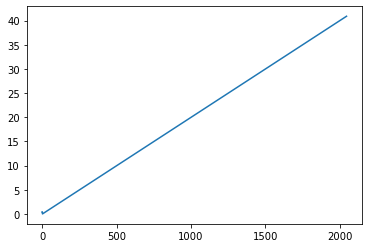

In [5]:
timedeltas=np.array([datetime.timedelta(seconds=((2.56e-6))*x) for x in fun_time[0,:]])
dt=t0+timedeltas
plt.plot([x.total_seconds() for x in timedeltas])

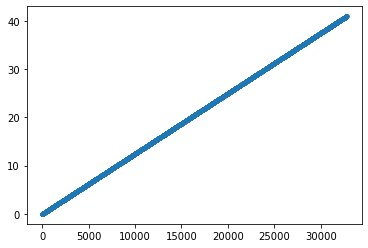

In [6]:
plt.plot([(datetime.datetime.fromtimestamp(x,pytz.utc)-t0).total_seconds() for x in np.array(f['timestamp']['ctime'][:,0])],'.')


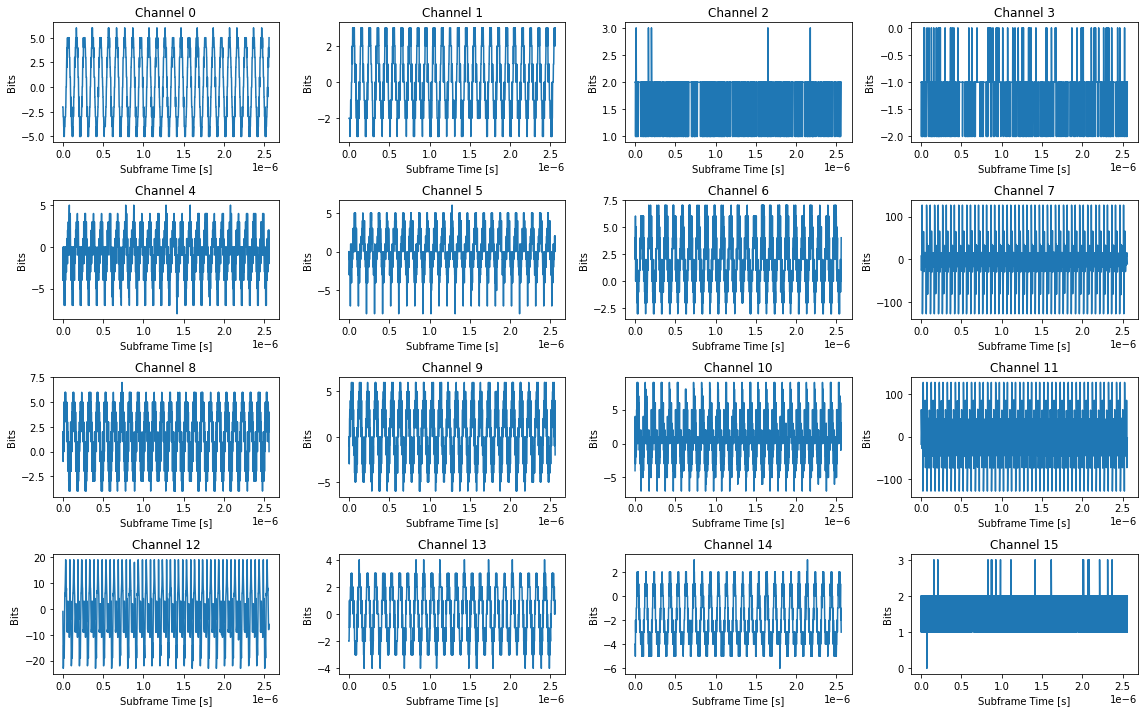

In [7]:
## Plot timeseries for each channel:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(16,10))
for i,ind in enumerate(range(16)):
    ax.flatten()[i].plot(1.25e-9*np.arange(2048),fun_data[ind,5,:],label="".format(f['adc_input']))
    ax.flatten()[i].set_title('Channel {}'.format(ind))
    ax.flatten()[i].set_ylabel('Bits')
    ax.flatten()[i].set_xlabel('Subframe Time [s]')
    #ax.flatten()[i].set_ylim(-5,5)
plt.tight_layout()

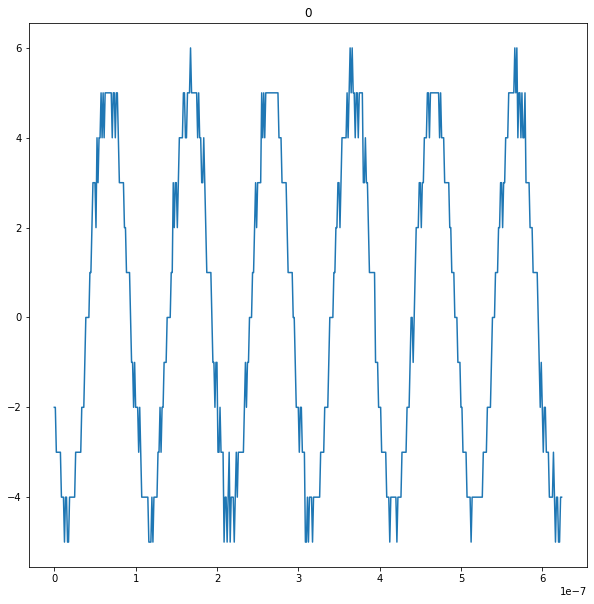

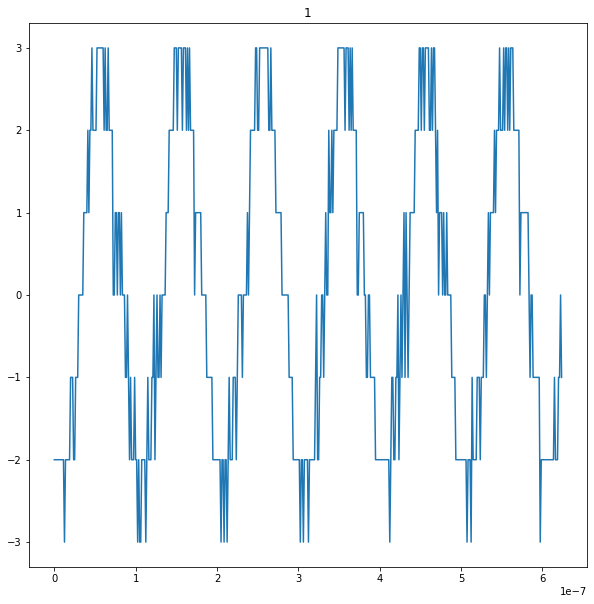

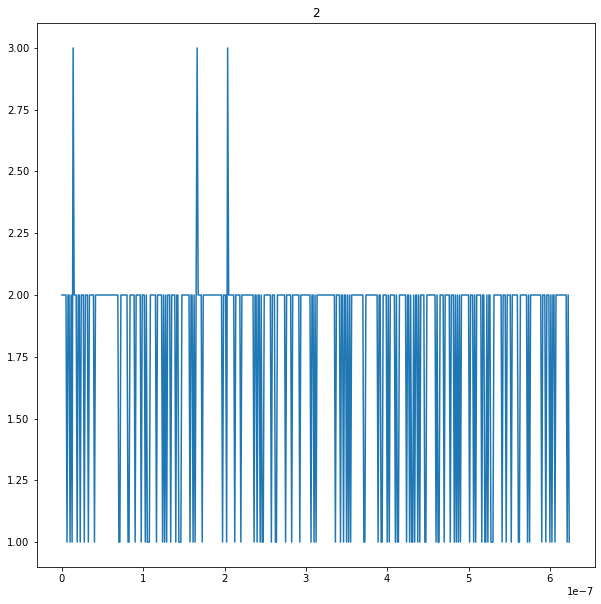

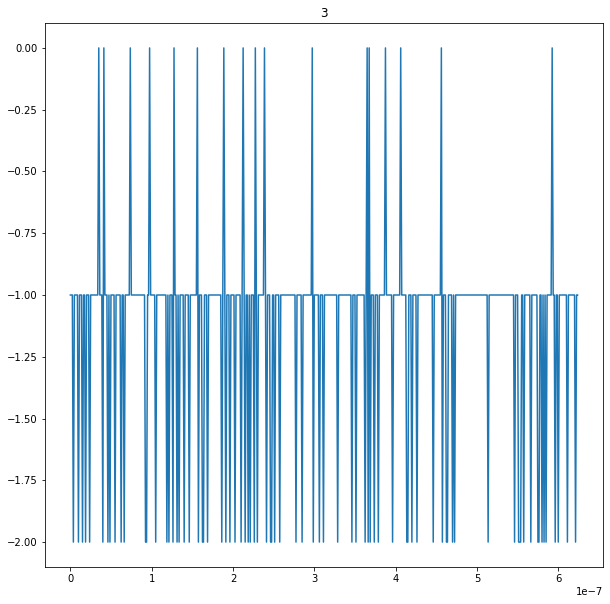

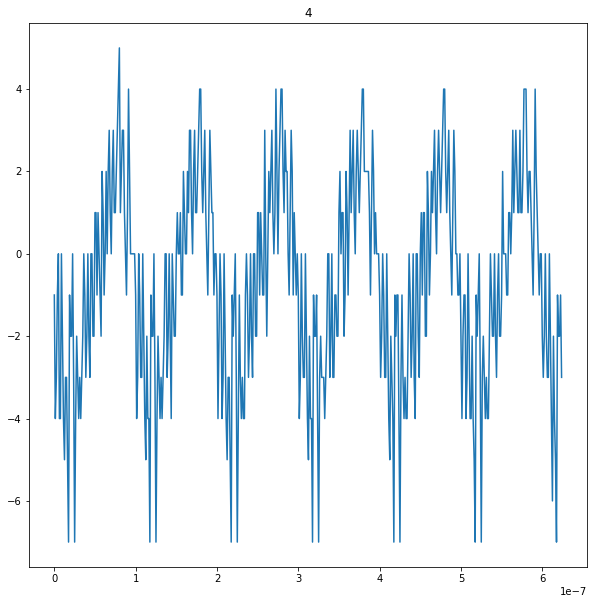

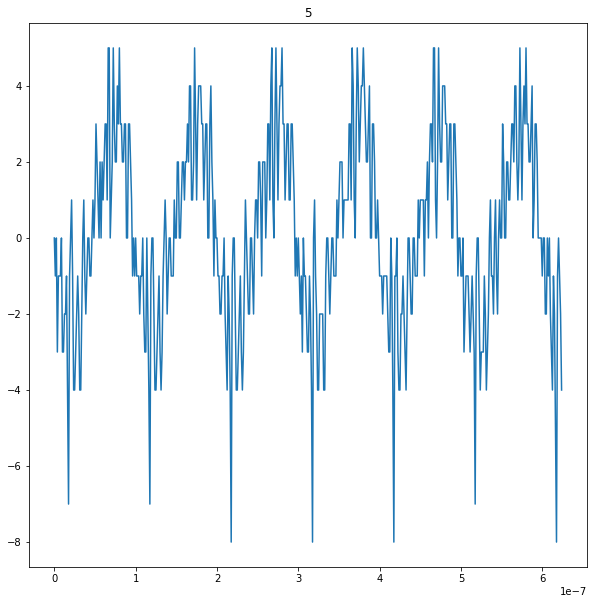

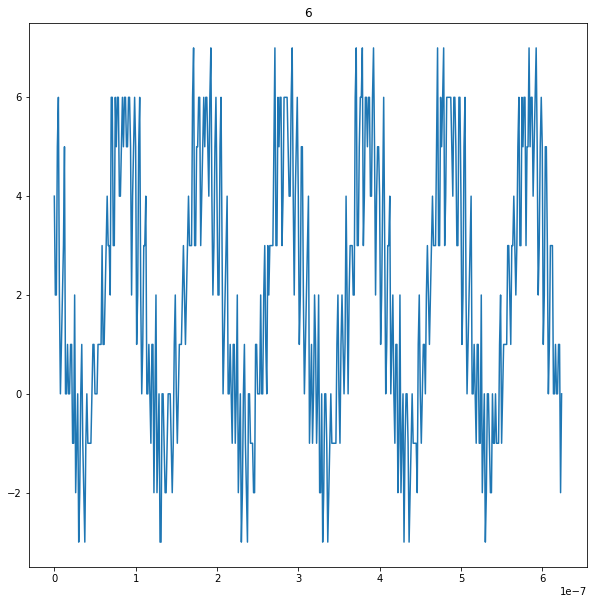

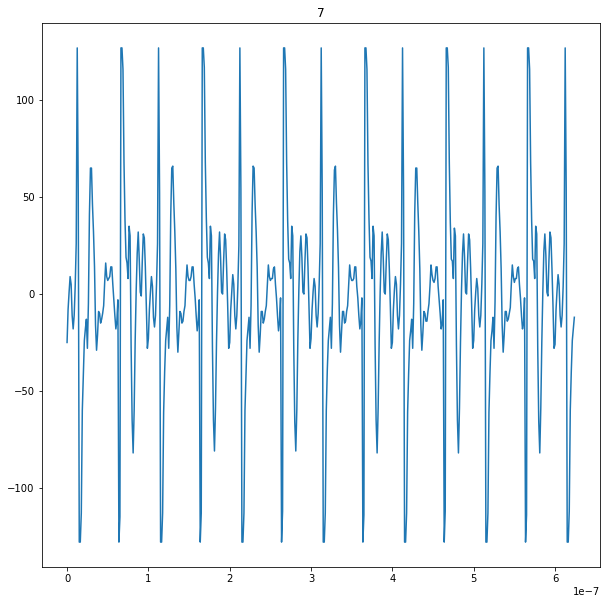

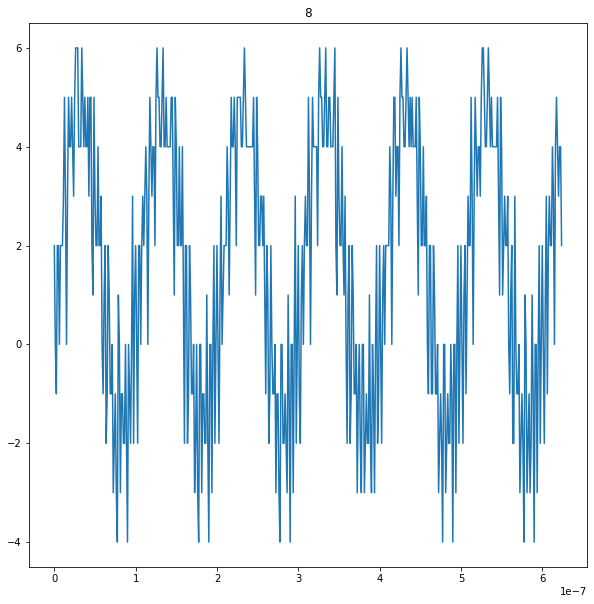

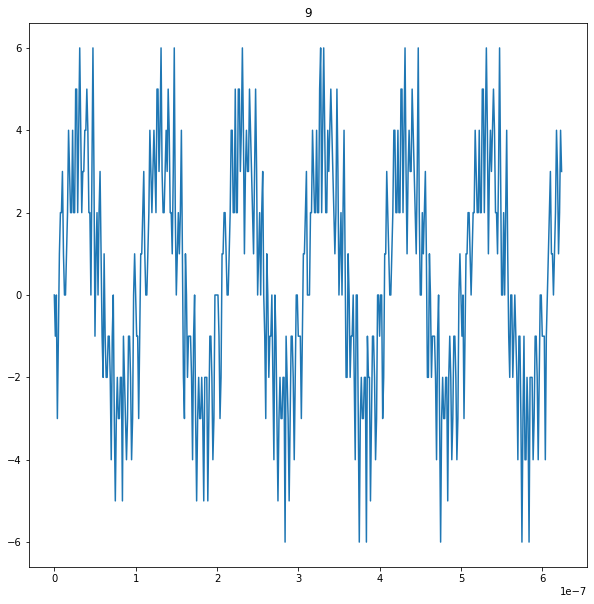

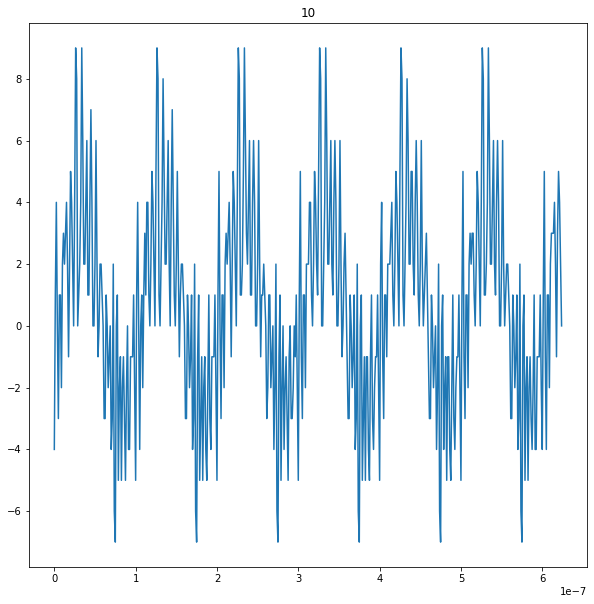

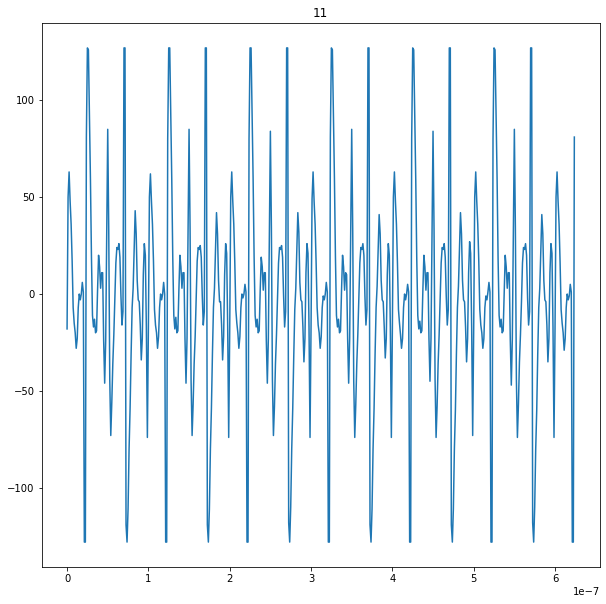

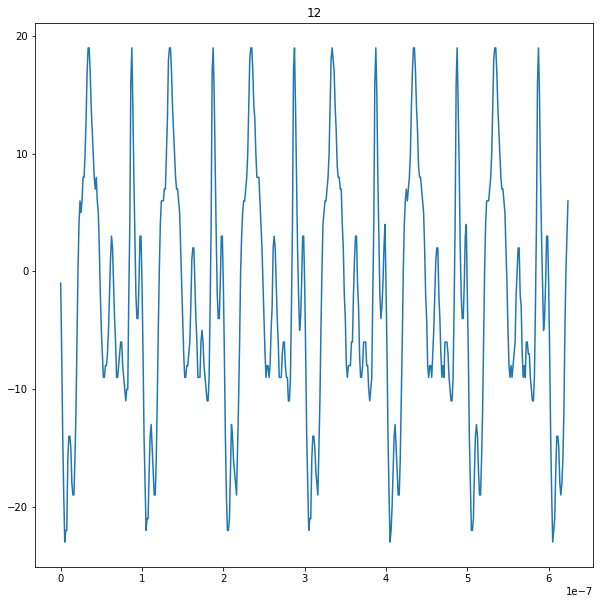

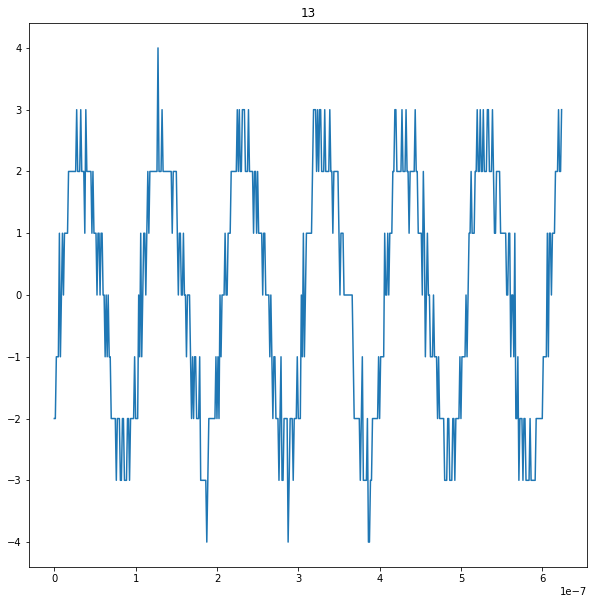

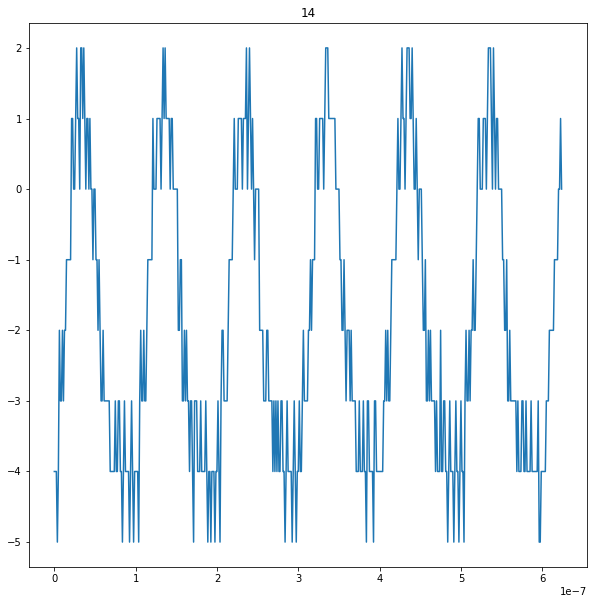

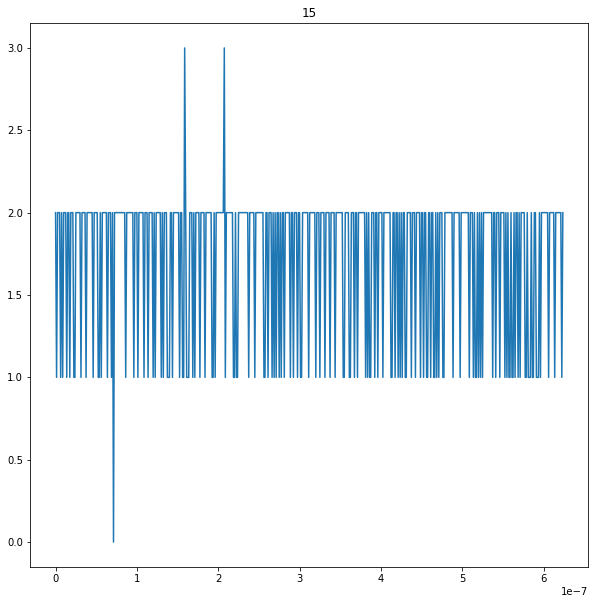

In [8]:
for ind in range(16):
    plt.figure(figsize=(10,10))
    plt.plot(1.25e-9*np.arange(2048)[:500],fun_data[ind,5,:500])
    plt.title("{}".format(ind))

In [8]:
## Import data for the used clock channels: 

## FURUNO 8804 SINE WAVE (clkout) (square is running the correlator)
furuno_sine_index = [0,0,0] # input to A1 = 0 [crate number, slot number, input number] 
furuno_sine = analyse_maser(folder_path, furuno_sine_index) # "maser" just means "the clock I'm looking at"

## TM4 (10MHz OUTPUT PORT)
tm4_index = [0,0,1] # input to A3 = 2
tm4 = analyse_maser(folder_path, tm4_index)

## OROLIA 12
orolia12_J101_index = [0,0,4]
orolia12_J101 = analyse_maser(folder_path, orolia12_J101_index)
orolia12_J102_index = [0,0,5]
orolia12_J102 = analyse_maser(folder_path, orolia12_J102_index)
orolia12_J103_index = [0,0,6]
orolia12_J103 = analyse_maser(folder_path, orolia12_J103_index)
orolia12_square_index = [0,0,7]
orolia12_square = analyse_maser(folder_path, orolia12_square_index)

## OROLIA 14
orolia14_J101_index = [0,0,8]
orolia14_J101 = analyse_maser(folder_path, orolia14_J101_index)
orolia14_J102_index = [0,0,9]
orolia14_J102 = analyse_maser(folder_path, orolia14_J102_index)
orolia14_J103_index = [0,0,10]
orolia14_J103 = analyse_maser(folder_path, orolia14_J103_index)
orolia14_square_index = [0,0,11]
orolia14_square = analyse_maser(folder_path, orolia14_square_index)

## BRANDYWINE GPSDO
brandywine_J2_index = [0,0,12] # input to A2 = 1
brandywine_J2 = analyse_maser(folder_path, brandywine_J2_index)
brandywine_J3_index = [0,0,13] # input to A2 = 1
brandywine_J3 = analyse_maser(folder_path, brandywine_J3_index) 
brandywine_J4_index = [0,0,14] # input to A2 = 1
brandywine_J4 = analyse_maser(folder_path, brandywine_J4_index) 

clocks=[furuno_sine,tm4,orolia12_J101,orolia12_J102,orolia12_J103,orolia12_square,orolia14_J101,orolia14_J102,orolia14_J103,orolia14_square,brandywine_J2,brandywine_J3,brandywine_J4]
titles=["furuno_sine","tm4_10MHz_sine_port","orolia12_J101","orolia12_J102","orolia12_J103","orolia12_square","orolia14_J101","orolia14_J102","orolia14_J103","orolia14_square","brandywine_J2","brandywine_J3","brandywine_J4"]

timing_data/03.08.2023man\000000
timing_data/03.08.2023man\000001
timing_data/03.08.2023man\000002
timing_data/03.08.2023man\000003
timing_data/03.08.2023man\000004
timing_data/03.08.2023man\000005
timing_data/03.08.2023man\000006
timing_data/03.08.2023man\000007
timing_data/03.08.2023man\000008
timing_data/03.08.2023man\000009
timing_data/03.08.2023man\000010
timing_data/03.08.2023man\000011
timing_data/03.08.2023man\000012
timing_data/03.08.2023man\000013
timing_data/03.08.2023man\000014
timing_data/03.08.2023man\000015
timing_data/03.08.2023man\000016
timing_data/03.08.2023man\000017
timing_data/03.08.2023man\000018
timing_data/03.08.2023man\000019
timing_data/03.08.2023man\000020
timing_data/03.08.2023man\000021
timing_data/03.08.2023man\000022
timing_data/03.08.2023man\000023
timing_data/03.08.2023man\000024
timing_data/03.08.2023man\000025
timing_data/03.08.2023man\000026
timing_data/03.08.2023man\000027
timing_data/03.08.2023man\000028
timing_data/03.08.2023man\000029
timing_dat

Loaded raw acq HDF5 file ... ####################################.................................] 85/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... #####################################................................] 86/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... #####################################................................] 87/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... ######################################...............................] 88/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... ######################################...............................] 89/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... #######################################..............................] 90/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... #######################################..............................] 91/143
Checking input [0, 0, 0] ... 
Loaded raw acq HDF5 file ... ############

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... ...................

Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 125/143
Checking input [0, 0, 1] ... 
Loaded raw acq HDF5 file ... #####

Loaded raw acq HDF5 file ... ######################...............................................] 60/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 61/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 62/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 63/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 64/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... #########################............................................] 65/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... #########################............................................] 66/143
Checking input [0, 0, 4] ... 
Loaded raw acq HDF5 file ... ############

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... ...................

Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 125/143
Checking input [0, 0, 5] ... 
Loaded raw acq HDF5 file ... #####

Loaded raw acq HDF5 file ... ######################...............................................] 60/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 61/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 62/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 63/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 64/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... #########################............................................] 65/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... #########################............................................] 66/143
Checking input [0, 0, 6] ... 
Loaded raw acq HDF5 file ... ############

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ...................

Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 125/143
Checking input [0, 0, 7] ... 
Loaded raw acq HDF5 file ... #####

Loaded raw acq HDF5 file ... ######################...............................................] 60/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 61/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 62/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 63/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 64/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... #########################............................................] 65/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... #########################............................................] 66/143
Checking input [0, 0, 8] ... 
Loaded raw acq HDF5 file ... ############

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... ...................

Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 125/143
Checking input [0, 0, 9] ... 
Loaded raw acq HDF5 file ... #####

Loaded raw acq HDF5 file ... ######################...............................................] 59/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... ######################...............................................] 60/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 61/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... #######################..............................................] 62/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 63/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... ########################.............................................] 64/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... #########################............................................] 65/143
Checking input [0, 0, 10] ... 
Loaded raw acq HDF5 file ... #####

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... ............

Loaded raw acq HDF5 file ... #######################################################..............] 118/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 11] ... 
Loaded raw acq HDF5 file ..

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ............

Loaded raw acq HDF5 file ... #######################################################..............] 118/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ..

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... ............

Loaded raw acq HDF5 file ... #######################################################..............] 118/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 13] ... 
Loaded raw acq HDF5 file ..

Loaded raw acq HDF5 file ... .....................................................................] 0/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 1/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 3/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 4/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 5/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... .....................................................................] 6/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... ............

Loaded raw acq HDF5 file ... #######################################################..............] 118/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... #######################################################..............] 119/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 120/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... ########################################################.............] 121/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... #########################################################............] 122/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... #########################################################............] 123/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ... ##########################################################...........] 124/143
Checking input [0, 0, 14] ... 
Loaded raw acq HDF5 file ..

In [10]:
print("h")

h


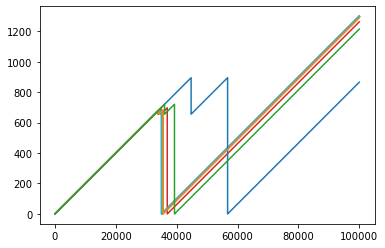

In [11]:
# plt.plot(np.array([datetime.timedelta(seconds=((2.56e-6))*x).seconds for x in tm4.fpgatime]))
# plt.plot(2.56e-6*brandywine_J2.fpgatime)
# plt.plot(2.56e-6*furuno_sine.fpgatime)

for i,clock in enumerate(clocks):
    plt.plot(2.56e-6*clock.fpgatime[:100000])

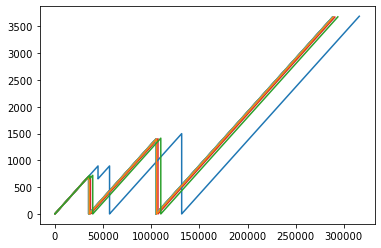

In [12]:
for i,clock in enumerate(clocks):
    plt.plot(2.56e-6*clock.fpgatime[:])

In [191]:
for clock in clocks:
    print(clock.fpgatime[:4]) # first FPGA time is FUCKED so REMOVE IT AND START AT 1 --> remove first data point !!

[    179676 1434189456 1434197268 1434205080]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]
[179676      0   7812  15624]


In [78]:
step = np.int64(7812)
print(step, type(step))

7812 <class 'numpy.int64'>


In [72]:
blorg = [0,1,2,3,5,6,7,5,7,8,9] # locations: 3, 6, 7 are the last good ones before error

diff = np.diff(blorg)
diffdiff=np.diff(diff)

fuckedinds=np.where(np.diff(np.diff(blorg))!=0)[0]

print(blorg)
print(diff)
print(diffdiff)

print("this marks the index of the last good time before a jump:")
print(fuckedinds)

#print(type(thing[7]))

#print(type(blorg[3]))

[0, 1, 2, 3, 5, 6, 7, 5, 7, 8, 9]
[ 1  1  1  2  1  1 -2  2  1  1]
[ 0  0  1 -1  0 -3  4 -1  0]
this marks the index of the last good time before a jump:
[2 3 5 6 7]


0 [] 288328 288329
1 [] 288329 288330
2 [] 288328 288329
3 [] 290665 290666
4 [] 288333 288334
5 [34013 35260 35262] 288569 288570
[265678308 265686120 265693932 265701744 265709556 265717368]
[7812 7812 7812 7812 7812]
6 [33916 35066 35068] 288333 288334
[264920544 264928356 264936168 264943980 264951792 264959604]
[7812 7812 7812 7812 7812]
7 [33966 35166 35168] 288461 288462
[265311144 265318956 265326768 265334580 265342392 265350204]
[7812 7812 7812 7812 7812]
8 [33968 35170 35172] 288463 288464
[265326768 265334580 265342392 265350204 265358016 265365828]
[7812 7812 7812 7812 7812]
9 [33916 35066 35068] 288333 288334
[264920544 264928356 264936168 264943980 264951792 264959604]
[7812 7812 7812 7812 7812]
10 [34833 44749 46816 56732 56734] 316042 316043
[272084148 272091960 272099772 272107584 272115396 272123208]
[7812 7812 7812 7812 7812]
11 [34178 35590 35592] 288992 288993
[266967288 266975100 266982912 266990724 266998536 267006348]
[7812 7812 7812 7812 7812]
12 [36023 39280 

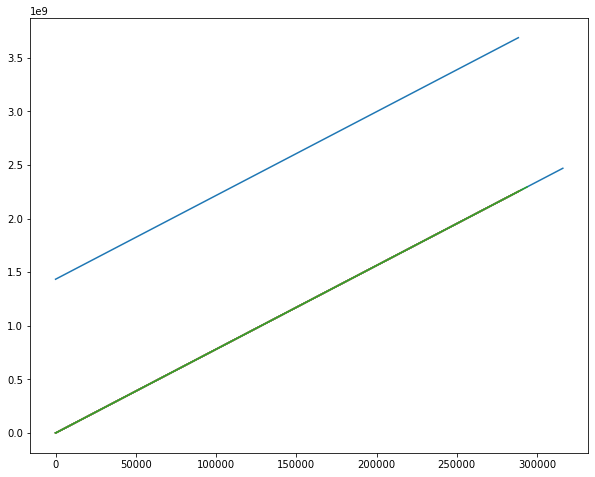

In [220]:
# HEAL CLOCK TIMES

new_fpgatimes=np.zeros(len(clocks)).astype(np.ndarray)

fig=plt.figure(figsize=(10,8))

step = np.int64(7812)

for n,clock in enumerate(clocks):
    thing = clock.fpgatime[1:] # don't override frikin clocks
    diff = np.diff(thing) - step
    fuckedinds = np.where((diff)!=0)[0] # <-- INDEX WHERE THE CLOCK RESETS
    corrected_fpga_time = thing # removing first time bc it's jank as hell and the fpga time at index 1 is 0

    for ind in fuckedinds: # for each jump spot
        start_time = corrected_fpga_time[ind-1]
        #print("previous time: ", start_time)
    
        for i in range(ind, ind+len(corrected_fpga_time[ind:])):
            corrected_fpga_time[i] = start_time + (i - ind + 1)*step
            #print("corrected time: ", corrected_fpga_time[i])
        
    new_fpgatimes[n] = corrected_fpga_time
    print(n, fuckedinds, len(new_fpgatimes[n]), len(clock.fpgatime))
    if len(fuckedinds)!=0: 
        print(clock.fpgatime[fuckedinds[0]-3:fuckedinds[0]+3])
        print(np.diff(clock.fpgatime[fuckedinds[0]-3:fuckedinds[0]+3]))
    plt.plot(clocks[n].fpgatime)

In [195]:
test_chunk = clocks[2].fpgatime[33910:33920] 

diff = np.diff(test_chunk)-step
fuckedinds=np.where((diff)!=0)[0] # <-- INDEX WHERE THE CLOCK RESETS

corrected_fpga_time = test_chunk[:] #TEST [1:] # removing first time bc it's jank as hell, the fpga time at index 1 is 0

for ind in fuckedinds:
    start_time = corrected_fpga_time[ind-1]
    
    for i in range(ind, ind+len(corrected_fpga_time[ind:])):
        corrected_fpga_time[i] = start_time + (i - ind + 1)*step
    
    
print(test_chunk)
print(diff)
print(fuckedinds)

print(corrected_fpga_time)
print(np.diff(corrected_fpga_time))

[264897108 264904920 264912732 264920544 264928356 264936168 264943980
 264951792 264959604 264967416]
[                   0                    0                    0
                    0                    0                    0
                    0 18446744073700567816                    0]
[7]
[264897108 264904920 264912732 264920544 264928356 264936168 264943980
 264951792 264959604 264967416]
[7812 7812 7812 7812 7812 7812 7812 7812 7812]


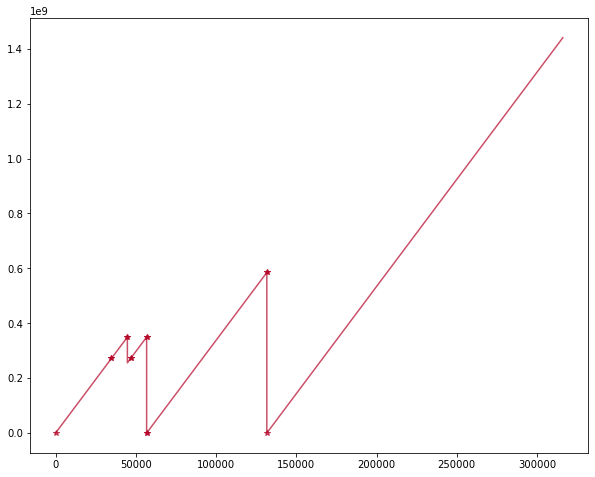

In [19]:
fig=plt.figure(figsize=(10,8))
plt.plot(clocks[10].fpgatime,c=colorsarr[i])
plt.plot(all_fuckedinds[10],clocks[10].fpgatime[all_fuckedinds[10]],'*',c=colorsarr[i])

In [166]:
clocks[3].fpgatime[1:5]

array([    0,  7812, 15624, 23436], dtype=uint64)

[50149]


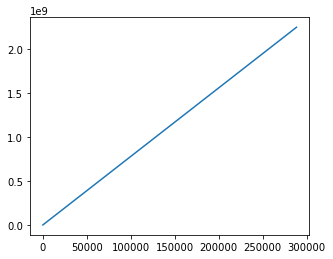

In [199]:
# heal clock 1:

step = np.int64(7812)

thing = clocks[2].fpgatime[1:]

#for clock in clocks[:1].fpgatime:
diff = np.diff(thing) - step
fuckedinds = np.where((diff)!=0)[0] # <-- INDEX WHERE THE CLOCK RESETS
corrected_fpga_time = thing # removing first time bc it's jank as hell and the fpga time at index 1 is 0

for ind in fuckedinds:
    start_time = corrected_fpga_time[ind-1]
    #print("previous time: ", start_time)
    
    for i in range(ind, ind+len(corrected_fpga_time[ind:])):
        corrected_fpga_time[i] = start_time + (i - ind + 1)*step
        #print("corrected time: ", corrected_fpga_time[i])
        
print(fuckedinds)

clocks[2].fpgatime = corrected_fpga_time

fig=plt.figure(figsize=(5,4))
plt.plot(clocks[2].fpgatime)

In [190]:
for i,clock in enumerate(clocks):
    thingus = clock.fpgatime[1:]
    print(i,thingus[:10])

    diff = np.diff(thingus) - step
    fuckedinds = np.where((diff)!=0)[0]

    print(i,fuckedinds)

0 [1434189456 1434197268 1434205080 1434212892 1434220704 1434228516
 1434236328 1434244140 1434251952 1434259764]
0 []
1 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
1 [104742]
2 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
2 [33916 35060 35070]
3 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
3 [34835 36904 36906]
4 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
4 [33916 35066 35068]
5 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
5 [34013 35260 35262]
6 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
6 [33916 35066 35068]
7 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
7 [33966 35166 35168]
8 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
8 [33968 35170 35172]
9 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
9 [33916 35066 35068]
10 [    0  7812 15624 23436 31248 39060 46872 54684 62496 70308]
10 [34833 44749 46816 56732 56734]
11 [    0  7812 1

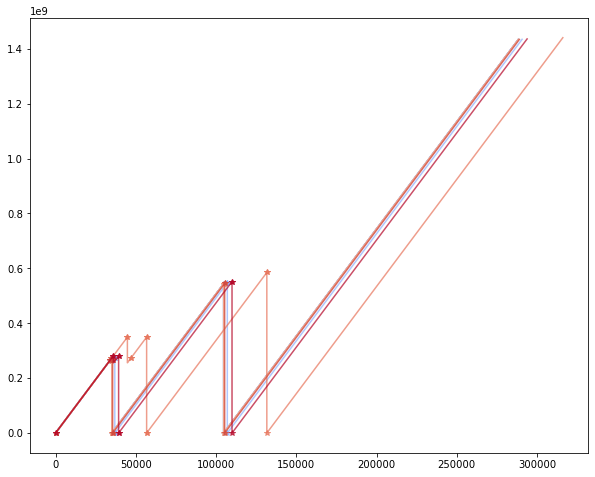

In [46]:
##Timing gaps!

colorsarr=plt.cm.coolwarm(np.linspace(0,1,len(clocks)),alpha=0.7)

all_fuckedinds=np.zeros(len(clocks)).astype(np.ndarray)
all_fuckedtimes=np.zeros(len(clocks)).astype(np.ndarray)
all_diffdiffs=np.zeros(len(clocks)).astype(np.ndarray)

faketimeinds = np.zeros(len(clocks)).astype(np.ndarray)
faketimes = np.zeros(len(clocks)).astype(np.ndarray)
susdiffs = np.zeros(len(clocks)).astype(np.ndarray)

fig=plt.figure(figsize=(10,8))
for i,clock in enumerate(clocks):
    plt.plot(clock.fpgatime,c=colorsarr[i])
    
    diffdiff = np.diff(np.diff(clock.fpgatime))
    
    fuckedinds=np.where(diffdiff>0)[0]
    
    susdiffs[i] = diffdiff[fuckedinds]
    
    all_fuckedinds[i] = fuckedinds
    all_fuckedtimes[i] = clock.fpgatime[fuckedinds]
    all_diffdiffs[i] = diffdiff
    
    #faketimeinds[i]=np.where(clock.fpgatime>1000000)
    #faketimes[i]=clock.fpgatime[faketimeinds]
    
    #print(i,fuckedinds)
    plt.plot(fuckedinds,clock.fpgatime[fuckedinds],'*',c=colorsarr[i])  

In [43]:
print("sussy diffs at the fucked indicies for clock 0:")
print([diff for diff in susdiffs[0]])
print("")
    
print("fucked indicies for first few clocks:")
for i,ind in enumerate(all_fuckedinds[:3]): 
    print('{:2}'.format(i),[ind for ind in all_fuckedinds[i][1:-1]])  
print("")

print("time stamps around first pair of fucked indicies:")

for i,clock in enumerate(clocks):
    print('{:2}'.format(i),[time for time in clock.fpgatime[33914:33921]])

sussy diffs at the fucked indicies for clock 0:
[187488, 18446744073700567816, 8983800, 18446744073444756064, 264795552, 18446744073709371940, 179676, 18446744073165414568, 543965184, 171864]

fucked indicies for first few clocks:
 0 [33916, 33917, 35066, 35067, 35068, 35069, 104743, 104744]
 1 [33916, 33917, 35066, 35067, 35068, 35069, 104743, 104744]
 2 [33916, 33917, 35066, 35067, 35068, 35069, 104743, 104744]

time stamps around first pair of fucked indicies:
 0 [264928356, 264936168, 264943980, 264951792, 255975804, 255983616, 255991428]
 1 [264928356, 264936168, 264943980, 264951792, 255975804, 255983616, 255991428]
 2 [264928356, 264936168, 264943980, 264951792, 255975804, 255983616, 255991428]
 3 [264928356, 264936168, 264943980, 264951792, 264959604, 264967416, 264975228]
 4 [264928356, 264936168, 264943980, 264951792, 255975804, 255983616, 255991428]
 5 [264928356, 264936168, 264943980, 264951792, 264959604, 264967416, 264975228]
 6 [264928356, 264936168, 264943980, 264951792

In [105]:
direclist=os.listdir("/timingdata")
for direc in direclist:
    print(len(os.listdir(direc)))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/timingdata'

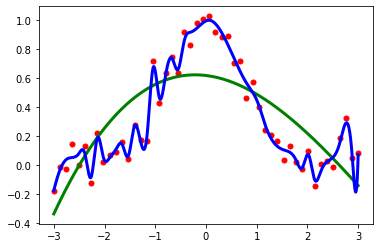

In [314]:
from scipy.interpolate import UnivariateSpline
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)
spl.set_smoothing_factor(0.1)
plt.plot(xs, spl(xs), 'b', lw=3)

In [353]:
len(new_fpgatimes[1])

288329

500
500


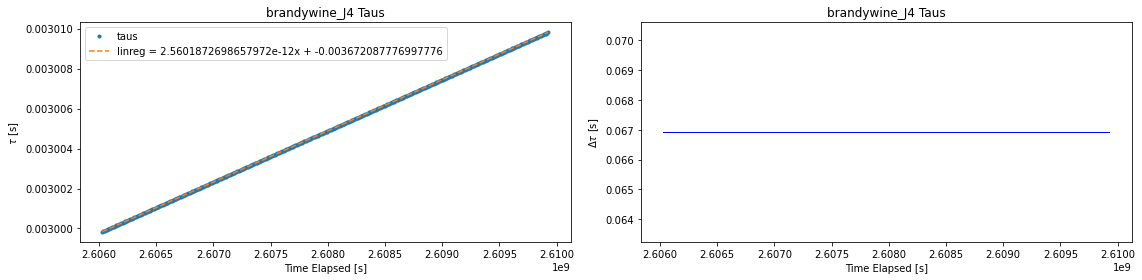

In [275]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
colorsarr = plt.cm.gnuplot2(np.linspace(0, 1, len(clocks)+1))

tsec = [x.seconds for x in timedeltas[::16]]
tlb = 150000  # 100000
tub = 150500  # -2000

n = 0

yax = clocks[n].taus[tlb:tub]
print(len(yax))

#tax = np.array(2.56e-6*clocks[n].fpgatime[tlb:tub]) # TIME !!
tax = new_fpgatimes[n][tlb:tub]

print(len(yax))

ax1 = axes[0]
ax1.plot(tax, yax, '.', label='taus')

popt, pcov = curve_fit(line_jackass, tax, yax) # <-- LINE
ax1.plot(tax, line_jackass(tax, *popt), '--', label='linreg = {}x + {}'.format(popt[0], popt[1]))

ax2 = axes[1]
#ax2.plot(tax, yax-line_jackass(tax, *popt), '.')

spl = UnivariateSpline(tax, yax-line_jackass(tax, *popt)) # <-- SPLINE
spl.set_smoothing_factor(0.1)
ax2.plot(tax, spl(yax-line_jackass(tax, *popt)), 'b', lw=1)

ax1.legend()
ax1.set_ylabel(r'$\tau$ [s]')
ax1.set_xlabel(r'Time Elapsed [s]')
ax1.set_title('{} Taus'.format(str(titles[i])))
ax2.set_ylabel(r'$\Delta\tau$ [s]')
ax2.set_xlabel(r'Time Elapsed [s]')
ax2.set_title('{} Taus'.format(str(titles[i])))
plt.tight_layout()
plt.show()

In [13]:
def plot_spline_thingi(clock_index, time_lower_bound, time_upper_bound, smoothing_factor = 0.000000000000001,plt_color = 'cornflowerblue',show_zoom = False, zoom=0.1,show_jitter_bounds=True):

    # vars 
    tsec = [x.seconds for x in timedeltas[::16]]
    tlb = time_lower_bound
    tub = time_upper_bound
    i = clock_index # clock selector    

    yax = clocks[i].taus[tlb:tub]
    tax = tax = np.array(2.56e-6*clocks[n].fpgatime[tlb:tub]) # new_fpgatimes[i][tlb:tub]
    
    # calculate line
    popt, pcov = curve_fit(line_jackass, tax, yax) # <-- LINE
    line_subtracted = yax-line_jackass(tax,*popt)
    
    # calculate spline
    spl = UnivariateSpline(tax, line_subtracted,k=5) # <-- SPLINE
    spl.set_smoothing_factor(smoothing_factor) #0.0000000000000001
    
    # zoom in part
    if show_zoom:
        zoom_width = np.int64(np.floor((tub - tlb)*zoom))
        print(zoom_width)
        
        plt.figure(figsize=(14,8))
        plt.plot(tax[:zoom_width], line_subtracted[:zoom_width], '.',markersize=1.5,color=plt_color)
        plt.plot(tax[:zoom_width], spl(tax)[:zoom_width], 'r', lw=1)
        plt.ylabel(r'$\Delta\tau$ [s]')
        plt.xlabel(r'Time Elapsed [s]')
        plt.title('{} Taus with spline fit, zoomed in for fit check'.format(str(titles[i])))
 
    # time data and spline
    plt.figure(figsize=(14,8))
    plt.plot(tax, line_subtracted, '.',markersize=1.5,color=plt_color) # plot time data
    plt.plot(tax, spl(tax), 'r', lw=1) # overlay fitting spline
    plt.ylabel(r'$\Delta\tau$ [s]')
    plt.xlabel(r'Time Elapsed [s]')
    plt.title('{} Taus with spline fit'.format(str(titles[i])))
    
    # jitter (spline subtracted)
    plt.figure(figsize=(14,8))
    plt.plot(tax, line_subtracted-spl(tax), '.', markersize=3,color=plt_color) # plot time - spline
    plt.ylabel(r'$\Delta\tau$ [s]')
    plt.xlabel(r'Time Elapsed [s]') # AUDREY CONVERT TO SECONDS if using new fpga time
    plt.title('{} Jitter'.format(str(titles[i])))
    
    if show_jitter_bounds:
        jitter = 1.68*10**-9        
        plt.axhline(y = jitter/2, color = 'r', linestyle = '-',label='jitter bounds (1.68ns magnitude)')
        plt.axhline(y = -jitter/2, color = 'r', linestyle = '-')
        plt.legend()
    

5500


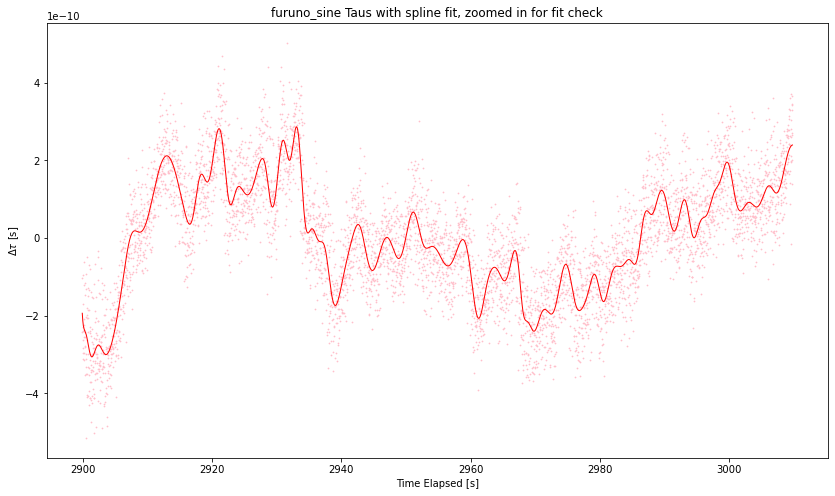

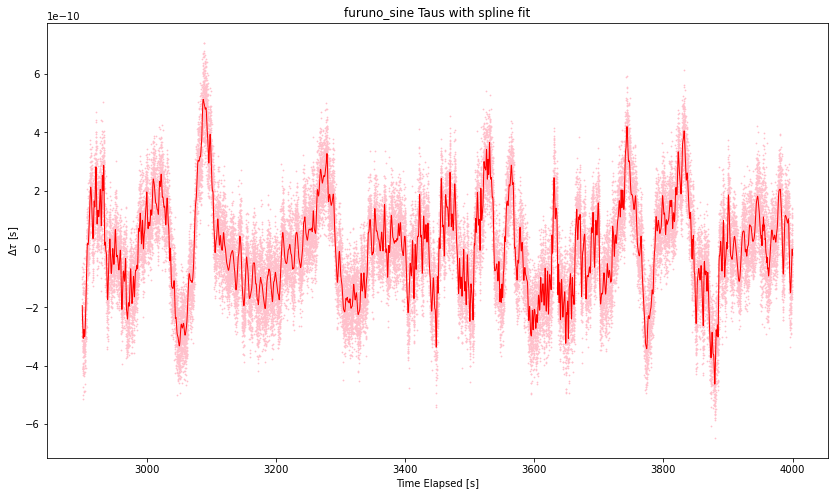

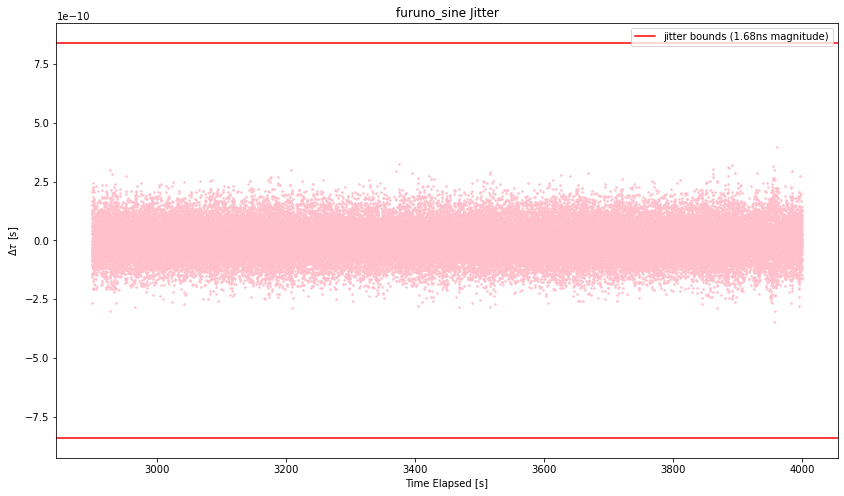

In [564]:
plot_spline_thingi(0,145000,200000,0.00000000000000034, show_zoom = True, plt_color='pink')

8400


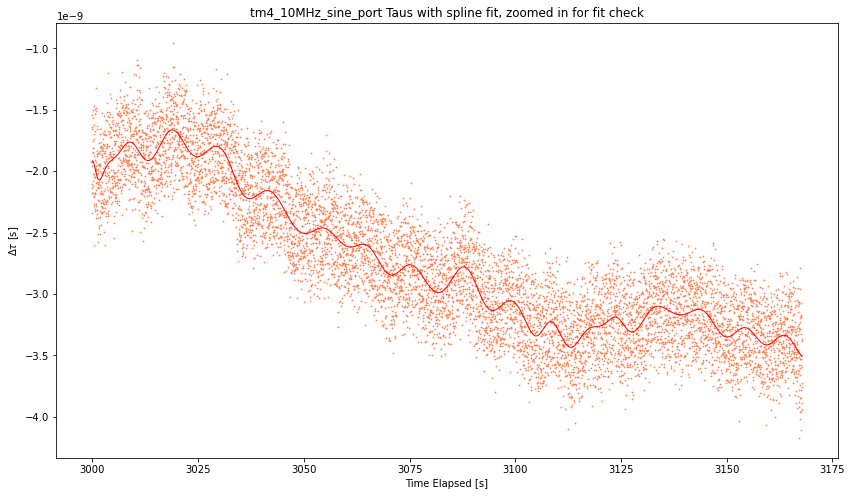

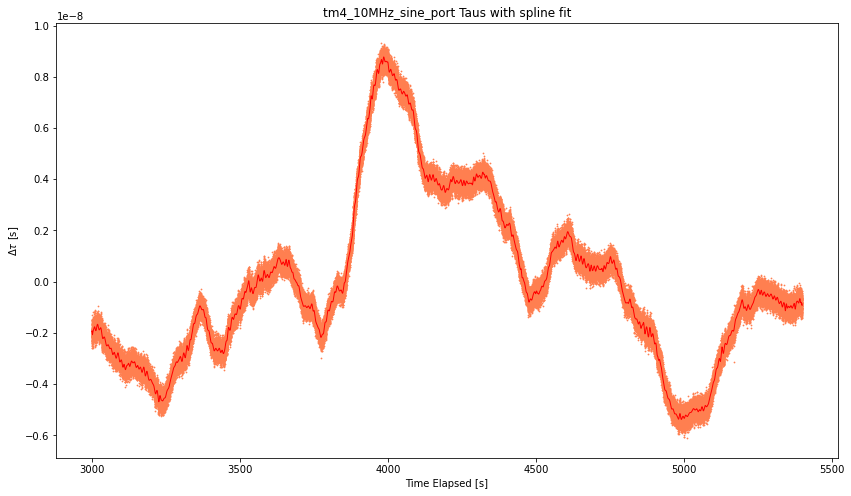

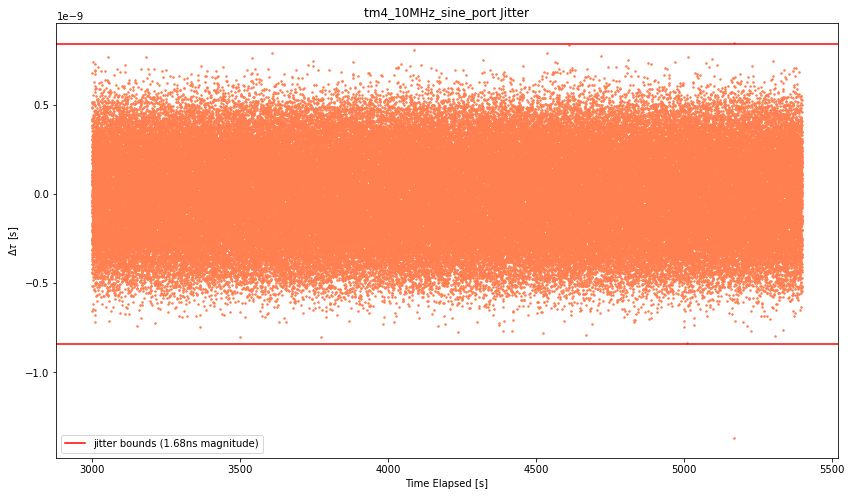

In [565]:
plot_spline_thingi(1,150000,270000,0.000000000000008, show_zoom = True, zoom=0.07, plt_color='coral')

5500


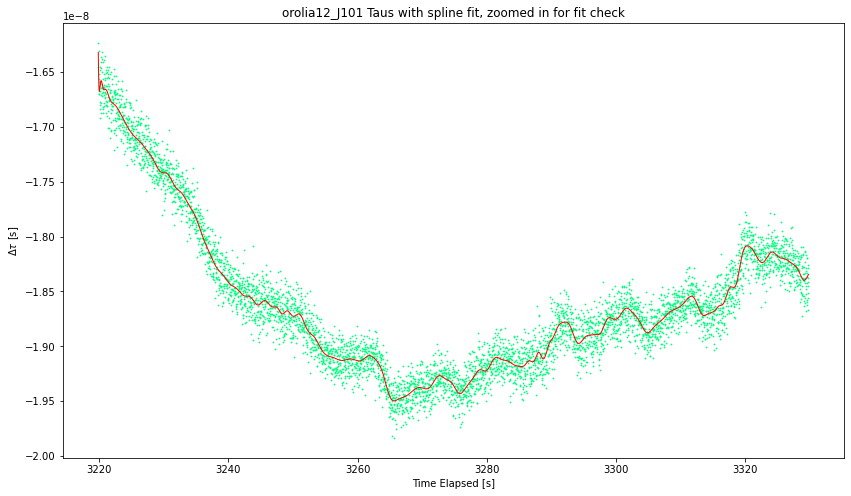

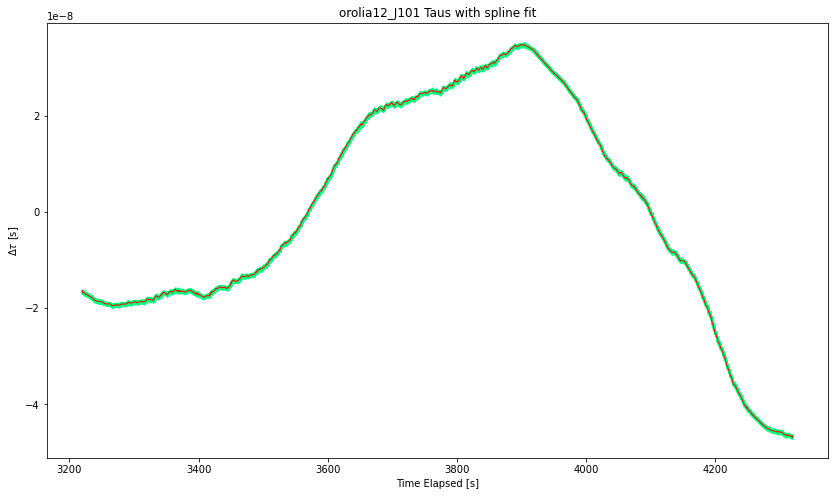

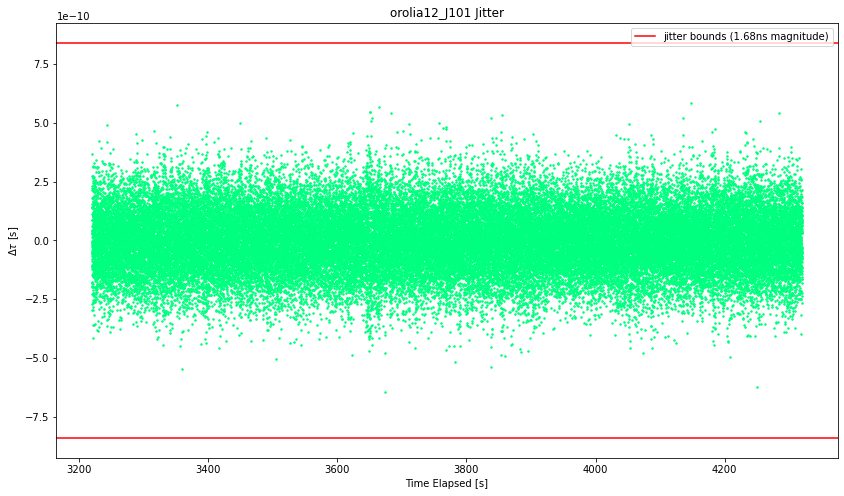

In [570]:
plot_spline_thingi(2,161000,216000,0.00000000000000096, show_zoom = True, plt_color = 'springgreen')

5500


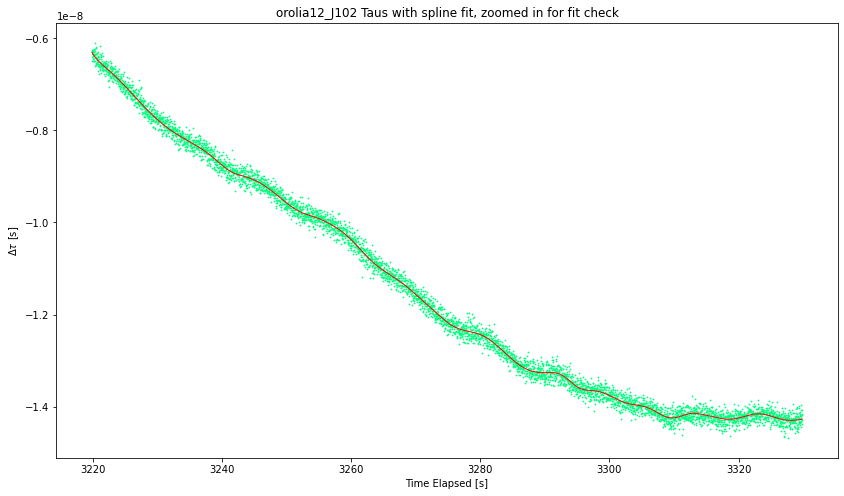

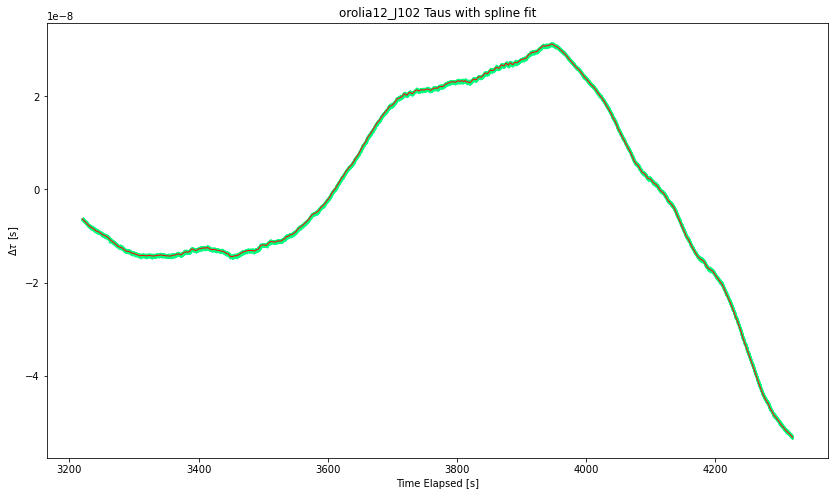

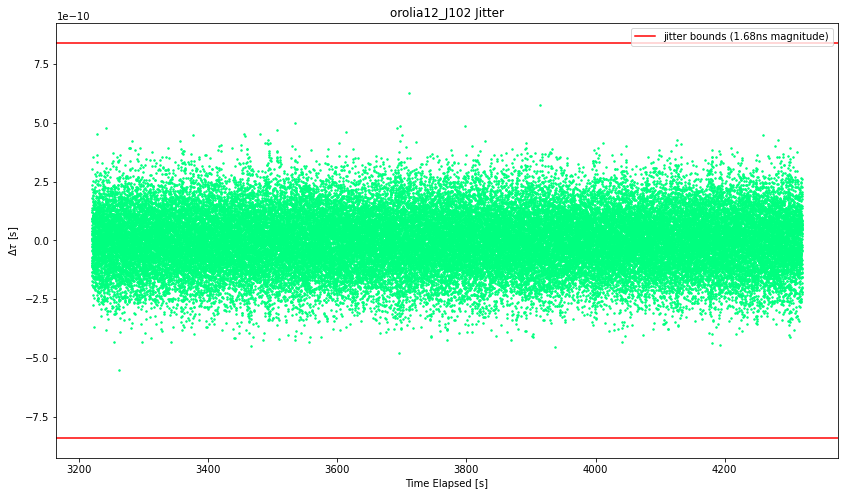

In [571]:
plot_spline_thingi(3,161000,216000,0.00000000000000087, show_zoom = True, plt_color = 'springgreen')

5500


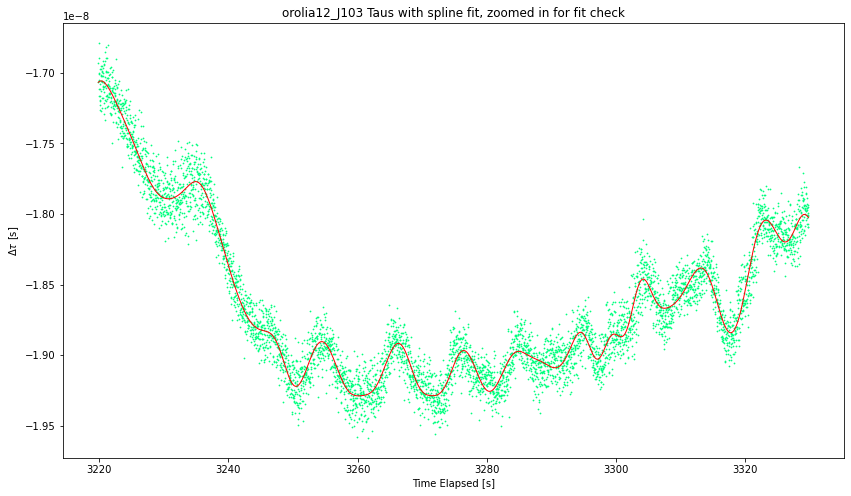

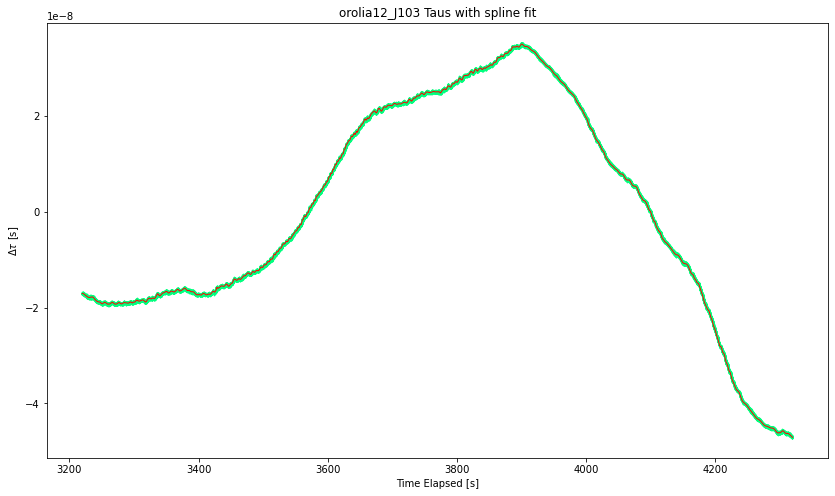

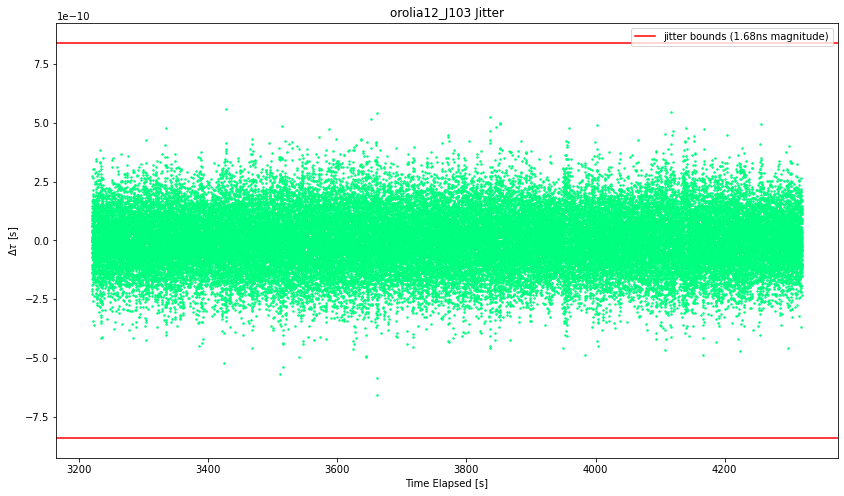

In [572]:
plot_spline_thingi(4,161000,216000,0.00000000000000085, show_zoom = True, plt_color = 'springgreen')

5500


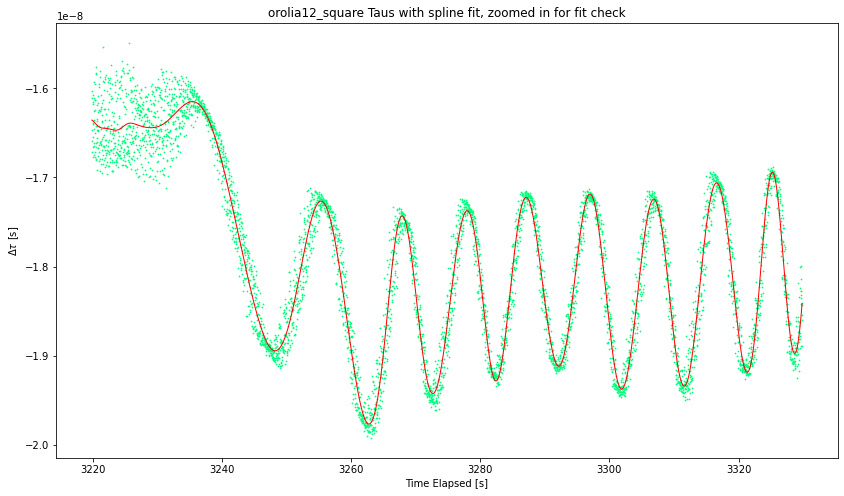

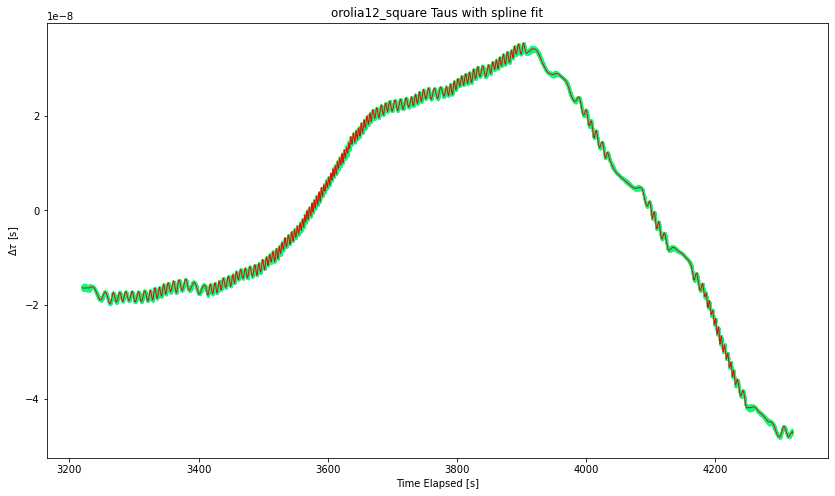

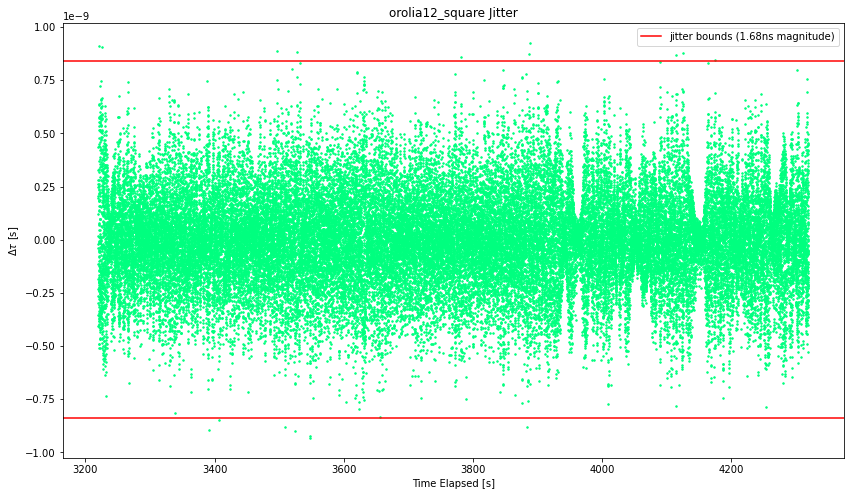

In [576]:
plot_spline_thingi(5,161000,216000,0.0000000000000025, show_zoom = True, plt_color = 'springgreen')

5500


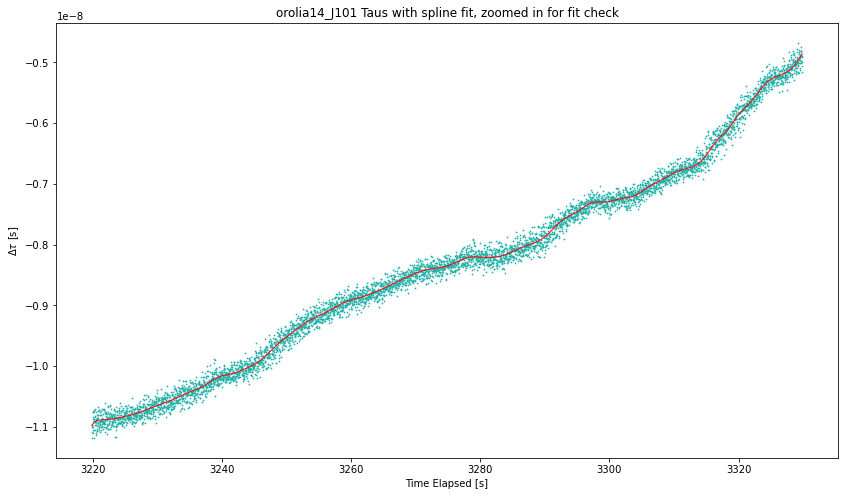

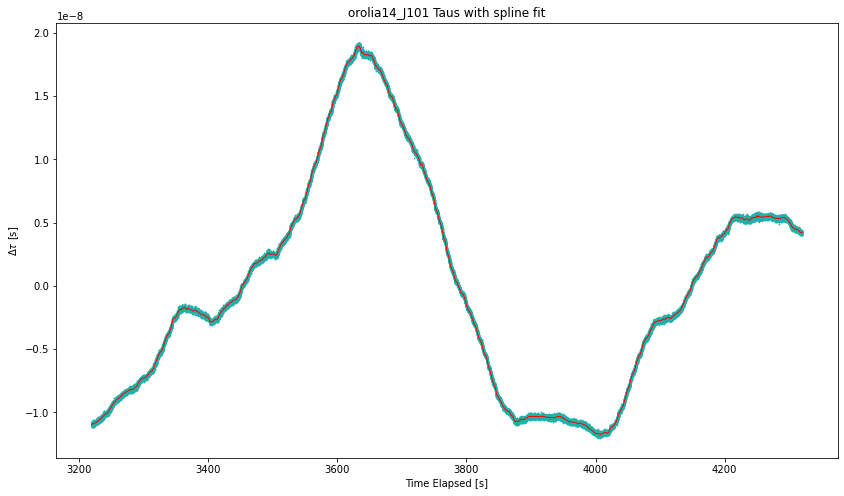

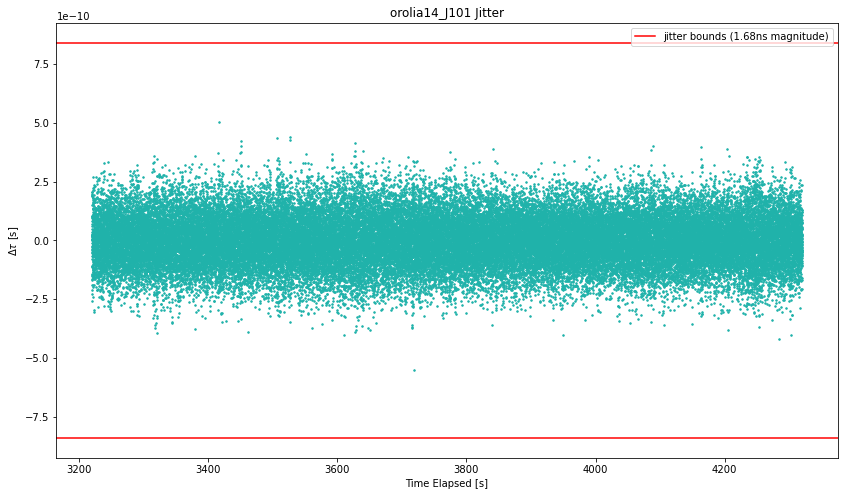

In [577]:
plot_spline_thingi(6,161000,216000,0.00000000000000062, show_zoom = True, plt_color = 'lightseagreen')

1350


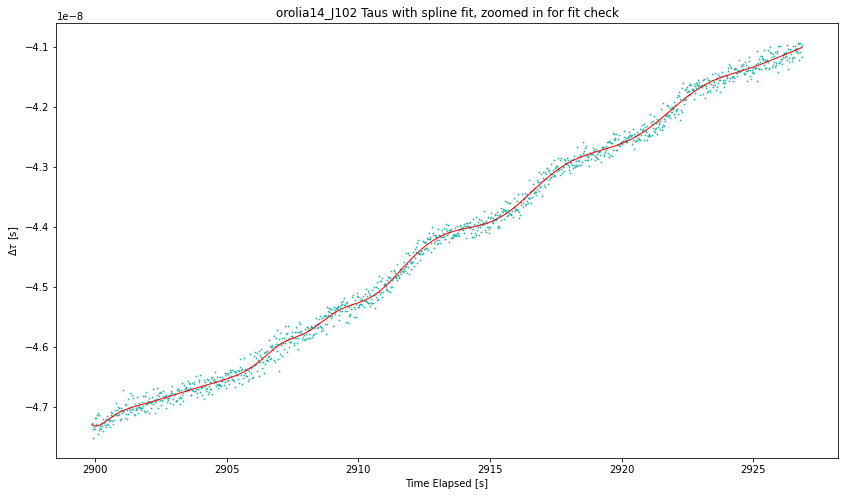

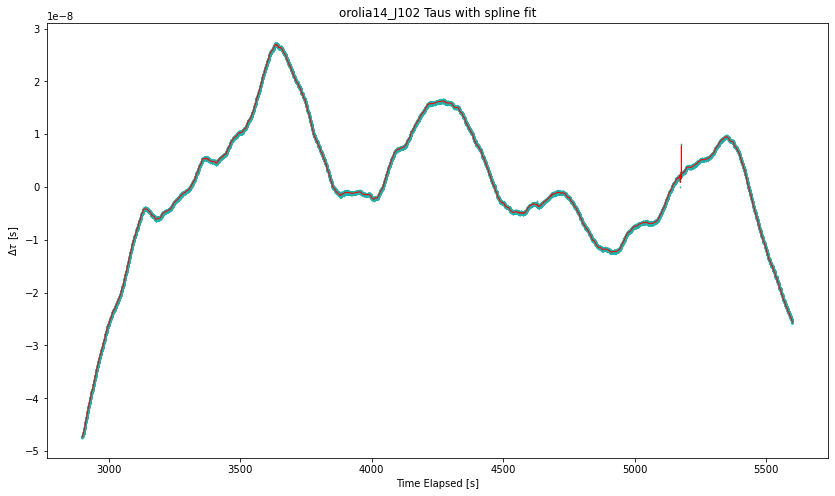

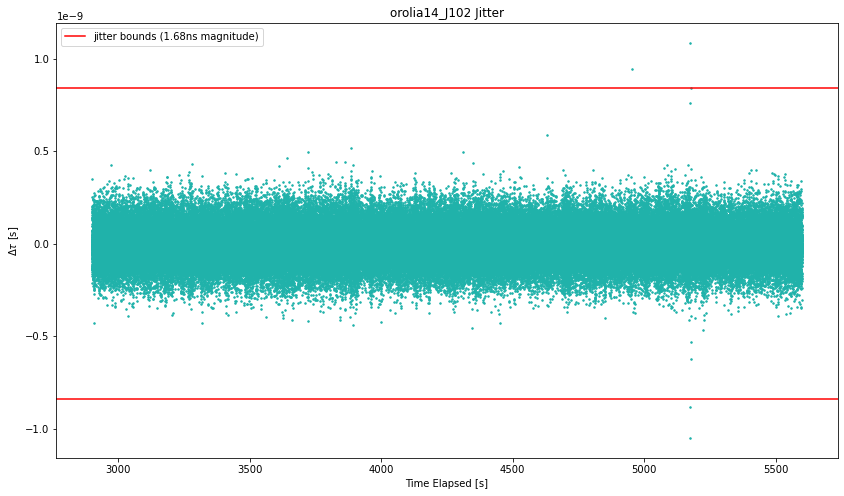

In [635]:
plot_spline_thingi(7,145000,280000,0.0000000000000015, show_zoom = True, plt_color = 'lightseagreen',zoom=0.01)

5500


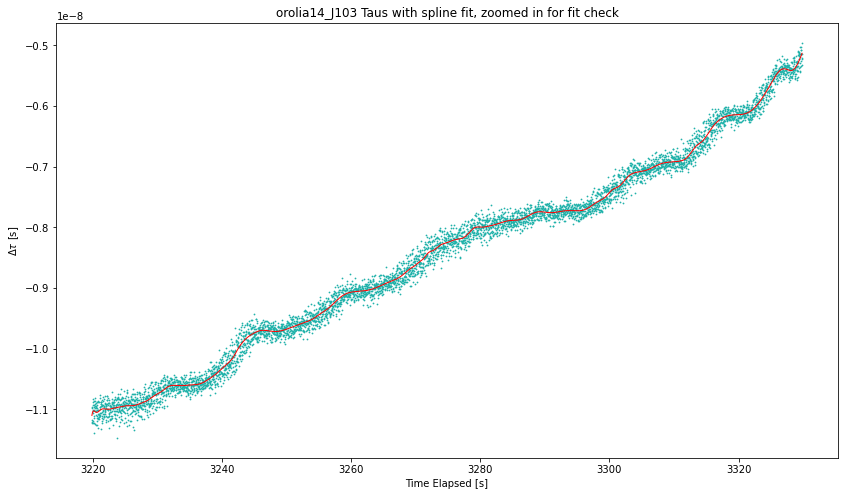

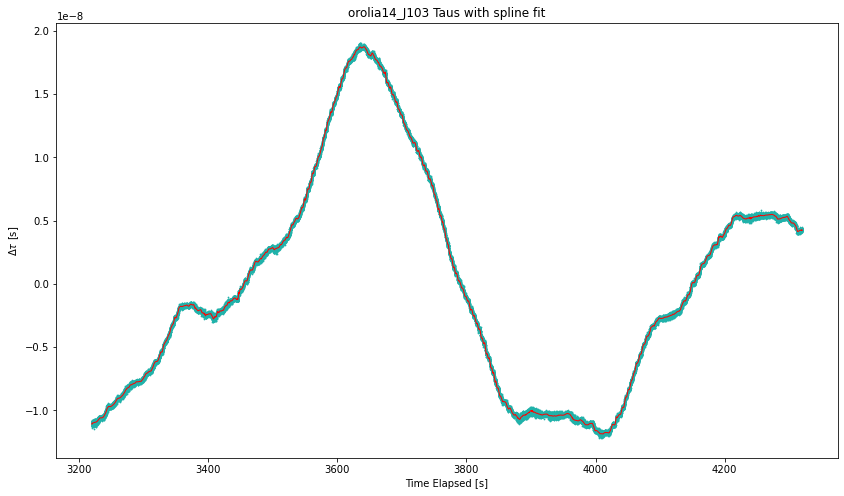

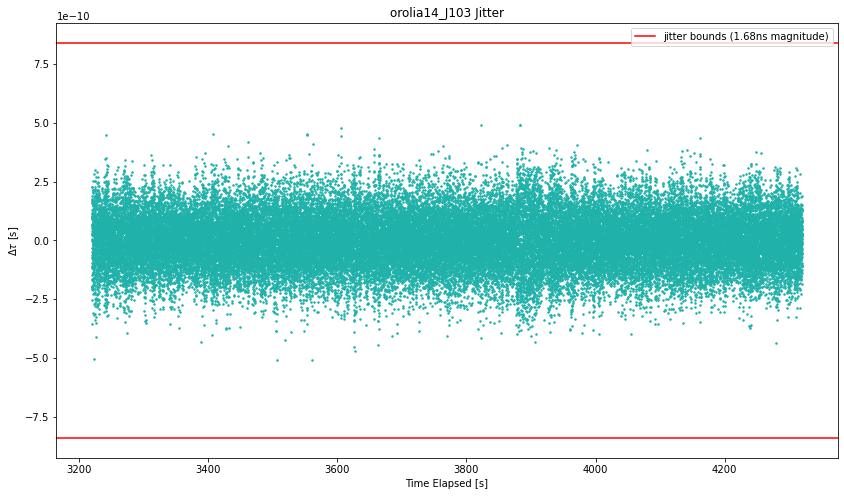

In [579]:
plot_spline_thingi(8,161000,216000,0.00000000000000069, show_zoom = True, plt_color = 'lightseagreen')

5500


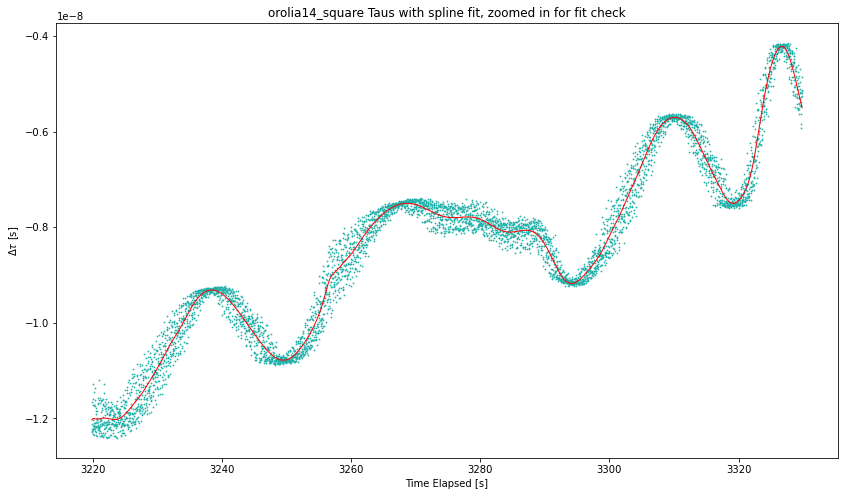

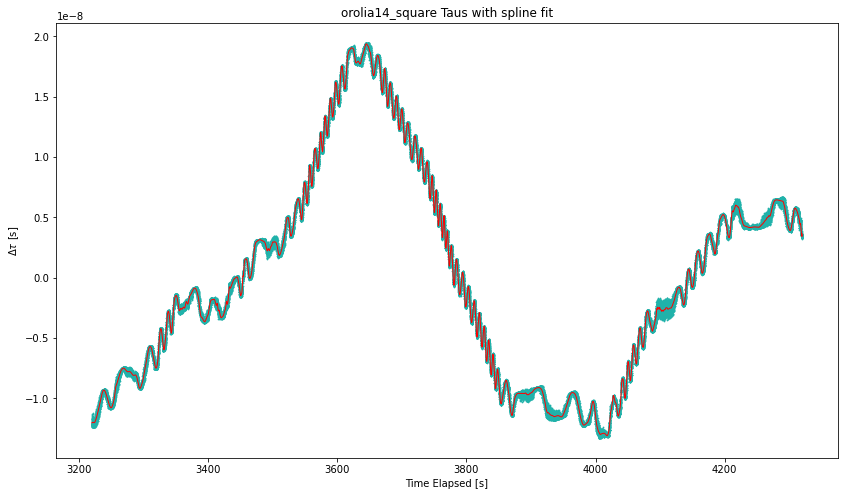

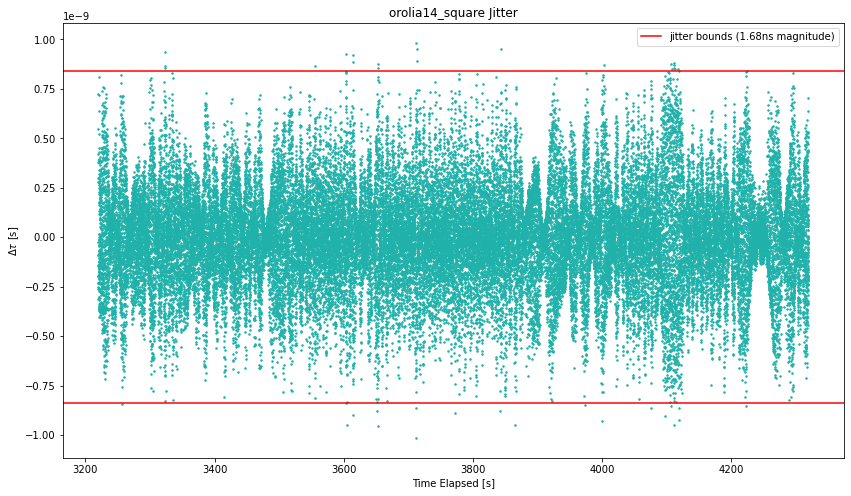

In [580]:
plot_spline_thingi(9,161000,216000,0.0000000000000031, show_zoom = True, plt_color = 'lightseagreen')

5500


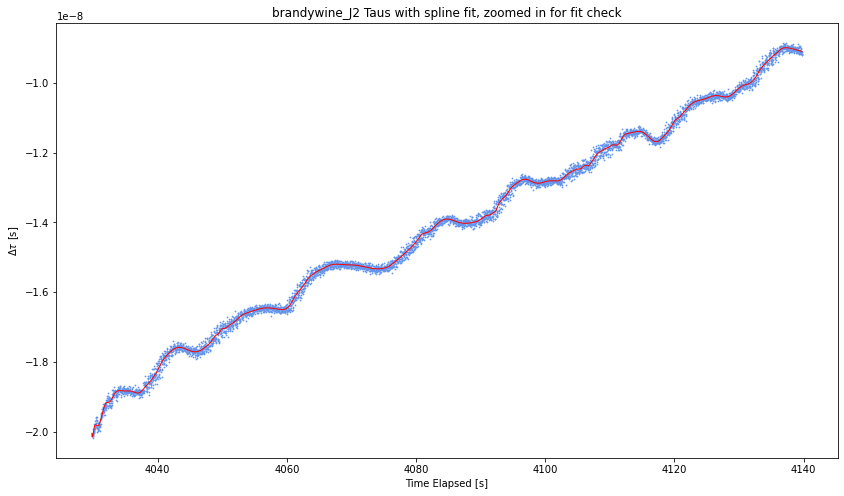

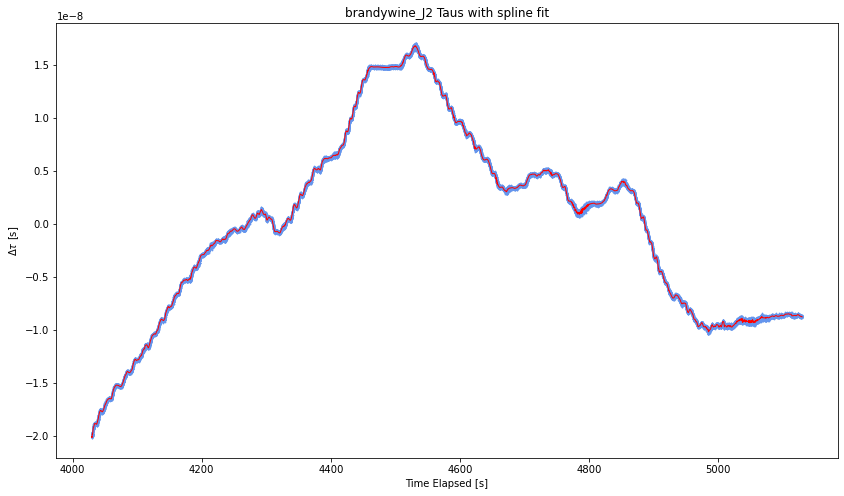

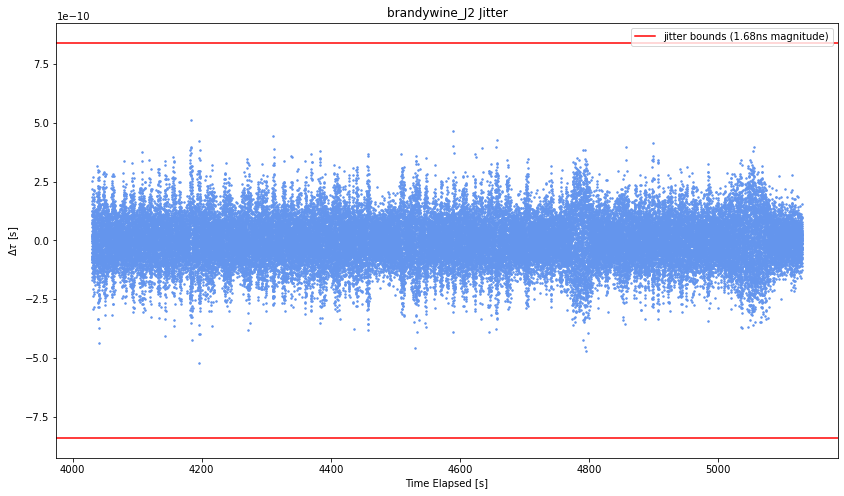

In [609]:
plot_spline_thingi(10,201500,256500,0.00000000000000053, show_zoom = True)

5500


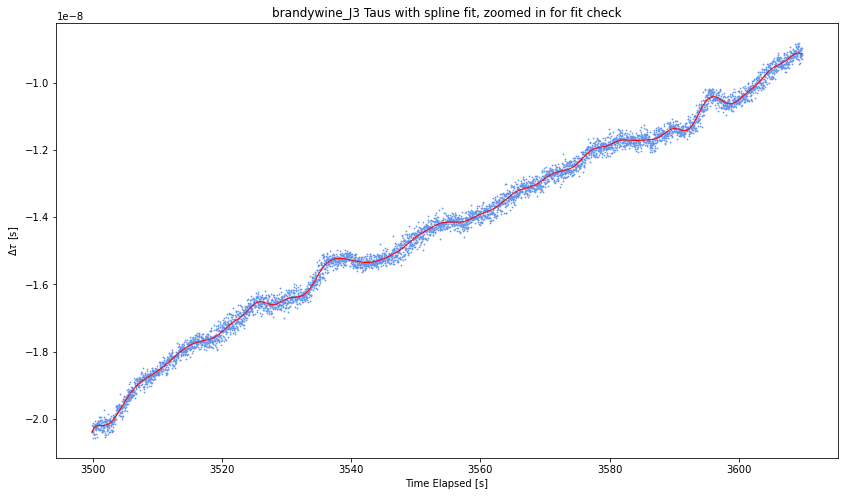

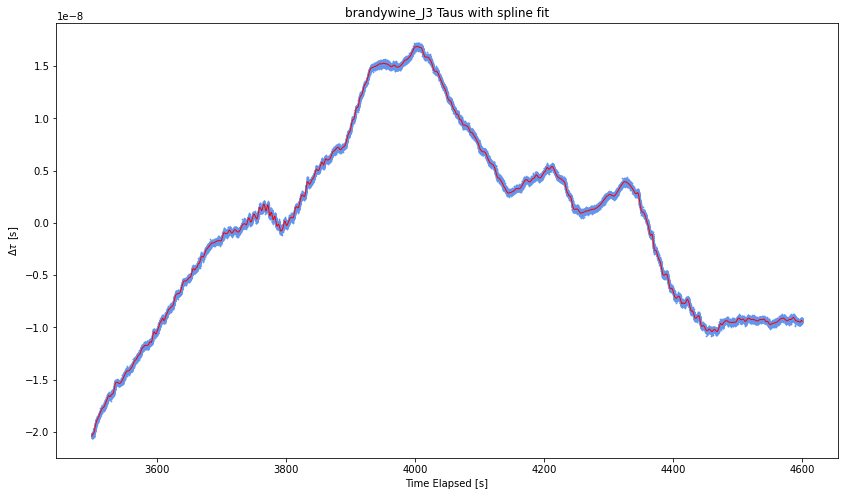

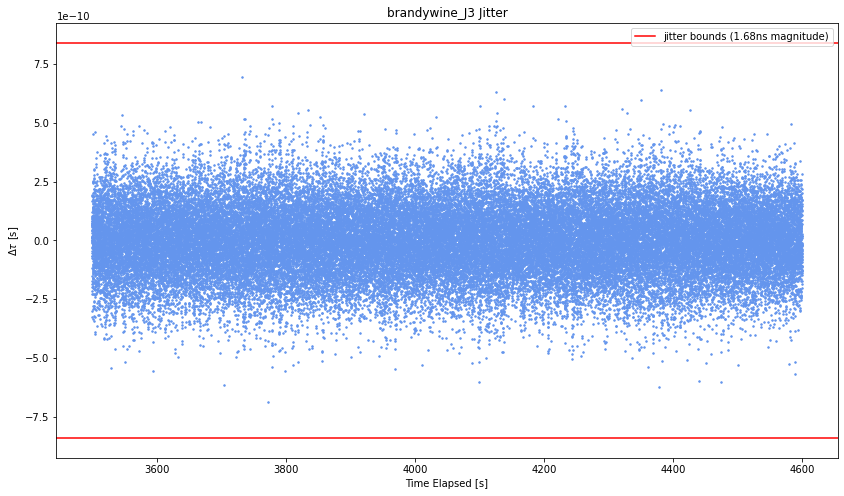

In [582]:
plot_spline_thingi(11,175000,230000,0.0000000000000012, show_zoom = True)

5500


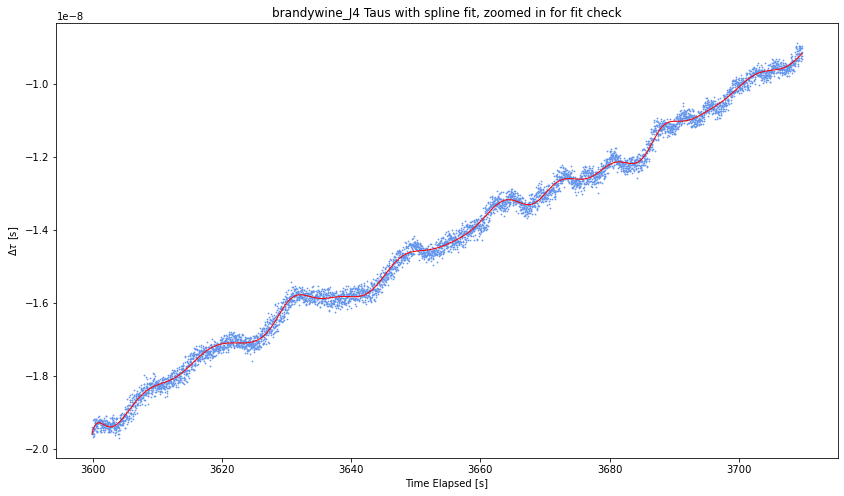

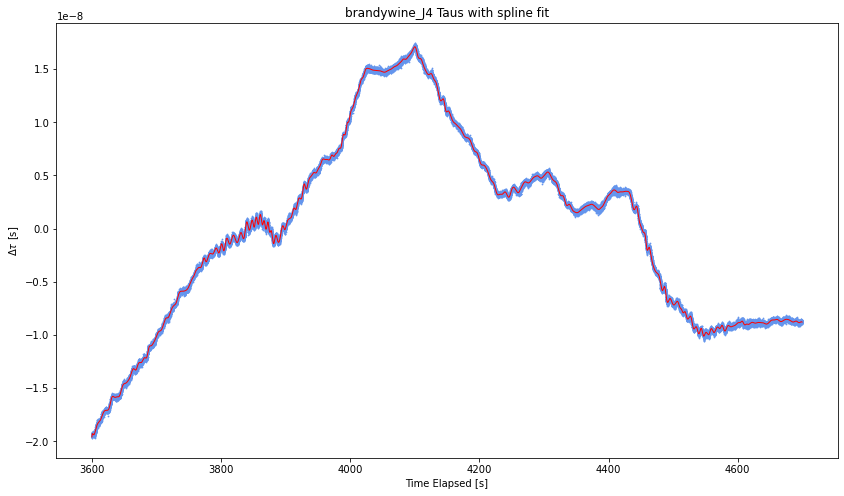

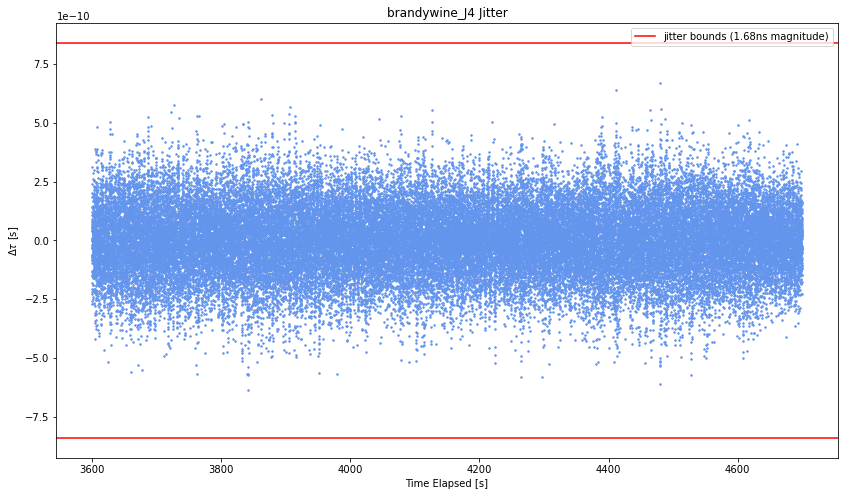

In [614]:
plot_spline_thingi(12,180000,235000,0.0000000000000012, show_zoom = True)

In [14]:
start_end=np.zeros(len(clocks)).astype(np.ndarray)
s_values=np.zeros(len(clocks)).astype(np.float64)

# furuno
start_end[0] = [145000,200000]
s_values[0] = 0.00000000000000034

# tm4
start_end[1] = [150000,270000]
s_values[1] = 0.000000000000008

# orolia 12
start_end[2] = [161000,216000]
s_values[2] = 0.00000000000000096
start_end[3] = [161000,216000]
s_values[3] = 0.00000000000000087
start_end[4] = [161000,216000]
s_values[4] = 0.00000000000000085
start_end[5] = [161000,216000] 
s_values[5] = 0.0000000000000025 # square

# orolia 14
start_end[6] = [161000,216000]
s_values[6] = 0.00000000000000062
start_end[7] = [161000,216000]
s_values[7] = 0.00000000000000062
start_end[8] = [161000,216000]
s_values[8] = 0.00000000000000069
start_end[9] = [161000,216000] 
s_values[9] = 0.0000000000000031 # square

# brandywine
start_end[10] = [201500,256500]
s_values[10] = 0.00000000000000053
start_end[11] = [175000,230000]
s_values[11] = 0.0000000000000012
start_end[12] = [180000,235000]
s_values[12] = 0.0000000000000012

# end of individual thingi

In [ ]:
## AUDREY STORE GOOD START AND END TIMES FOR EACH OF THESE GUYS AND GOOD S VALUES THEN USE BELOW

In [ ]:
## AUDREY ALSO TRY RUNNING AN OROLIA FOR THE WHOLE TIME !!! SEE WHAT'S PLOT LOL (OR JUST MAX LONG TIME)

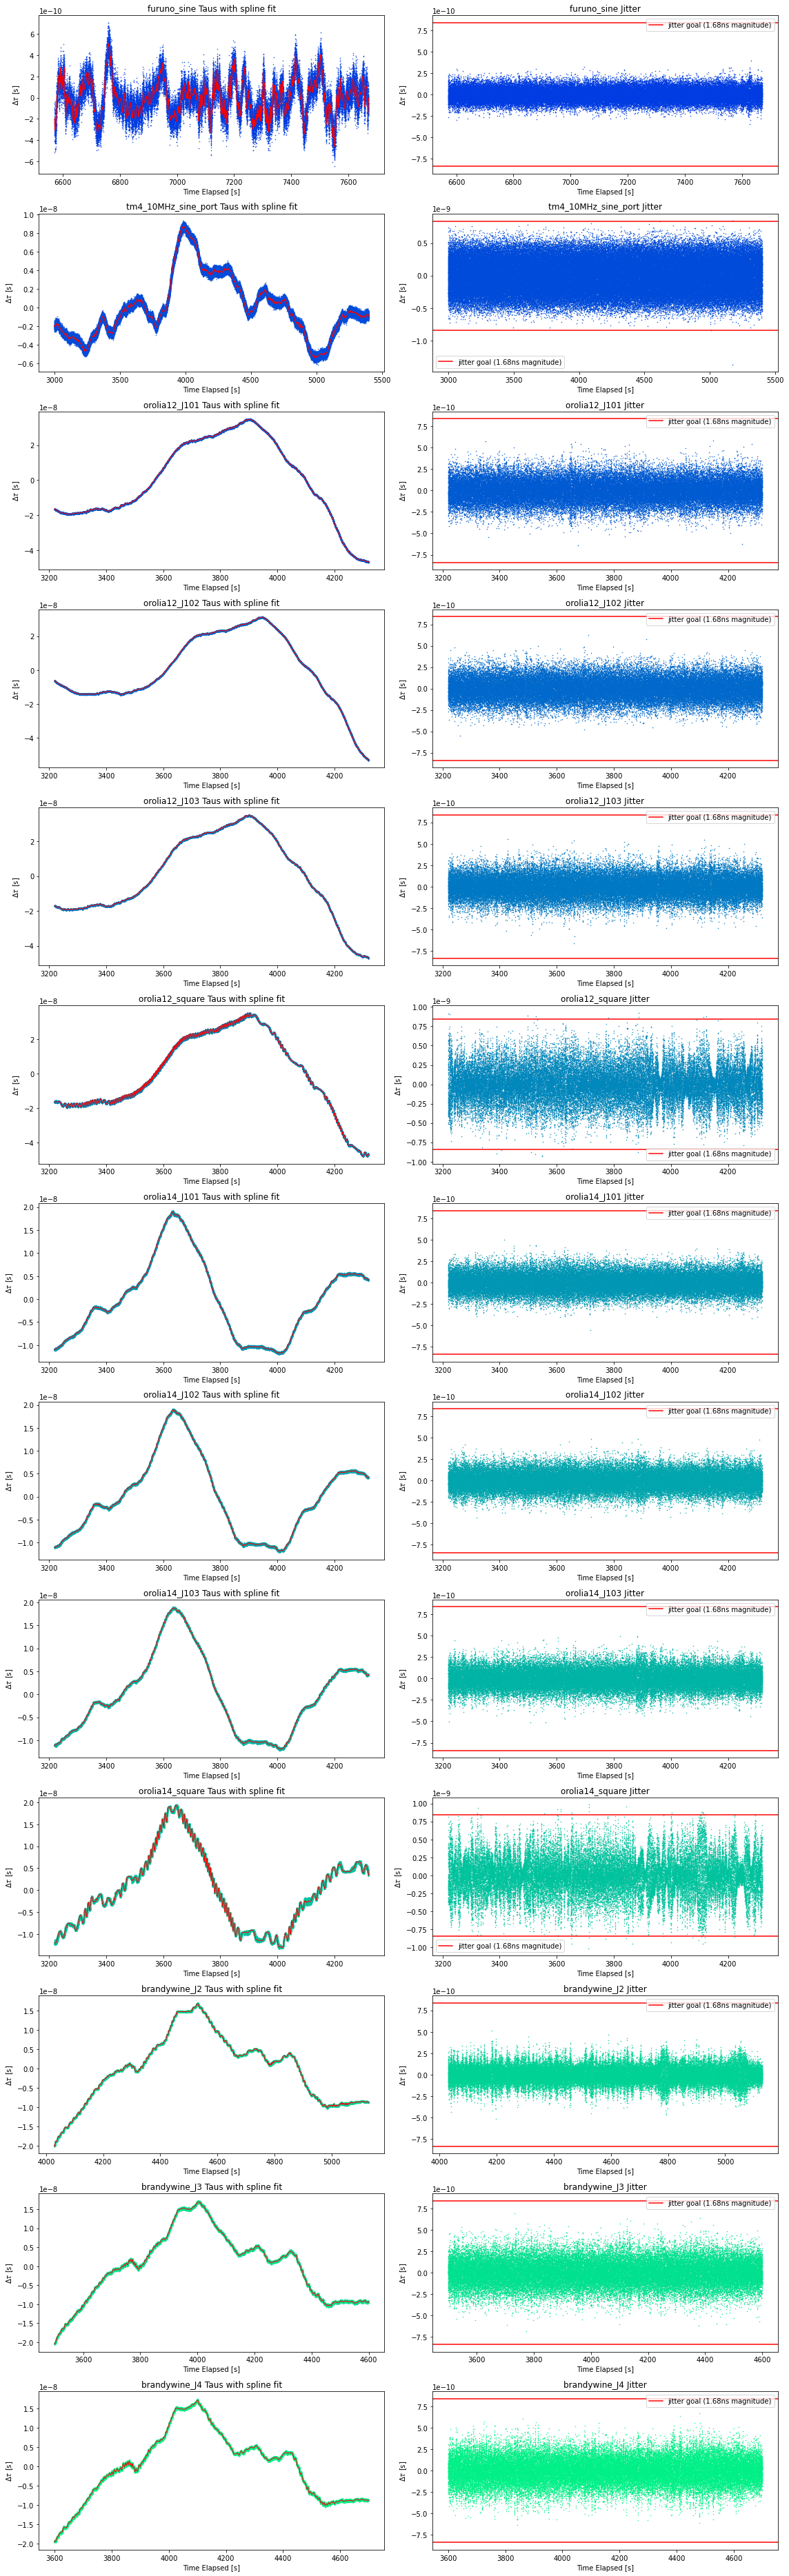

In [616]:
fig,axes=plt.subplots(nrows=len(clocks),ncols=2,figsize=(16,int(4*len(clocks))))
colorsarr=plt.cm.winter(np.linspace(0,1,len(clocks)+5))
tsec=[x.seconds for x in timedeltas[::16]]

for i,ax in enumerate(axes):
    
    tlb = start_end[i][0] # 150000
    tub = start_end[i][1] # 155000
    smoothing_factor = s_values[i]
    
    ax1,ax2=ax
    yax=clocks[i].taus[tlb:tub]
    #print(len(yax))
    tax=np.array(2.56e-6*clocks[i].fpgatime[tlb:tub]) # TIME !!
    #print(len(yax))
    #ax1.plot(tax,yax,'.',c=colorsarr[i],label='taus')
    
    popt,pcov=curve_fit(line_jackass,tax,yax) # <-- LINE
    #ax1.plot(tax,line_jackass(tax,*popt),'--',c=colorsarr[i],label='linreg = {}x + {}'.format(popt[0],popt[1]))
    
    line_subtracted = yax-line_jackass(tax,*popt)
    ax1.plot(tax,line_subtracted,'.',markersize=1,c=colorsarr[i+4])
    
    spl = UnivariateSpline(tax, line_subtracted,k=5) # <-- SPLINE
    spl.set_smoothing_factor(smoothing_factor)
    ax1.plot(tax, spl(tax), 'r', lw=1)
    
    ax2.plot(tax, line_subtracted-spl(tax),'.',markersize=1,c=colorsarr[i+4])

    #print(popt)
    #ax1.legend()
    ax1.set_ylabel(r'$\Delta\tau$ [s]') #ax1.set_ylabel(r'$\tau$ [s]')
    ax1.set_xlabel(r'Time Elapsed [s]')
    ax1.set_title('{} Taus with spline fit'.format(str(titles[i])))
    
    ax2.set_ylabel(r'$\Delta\tau$ [s]')
    ax2.set_xlabel(r'Time Elapsed [s]')
    ax2.set_title('{} Jitter'.format(str(titles[i])))
    
    jitter = 1.68*10**-9        
    ax2.axhline(y = jitter/2, color = 'r', linestyle = '-',label='jitter goal (1.68ns magnitude)')
    ax2.axhline(y = -jitter/2, color = 'r', linestyle = '-')
    ax2.legend()
    
plt.tight_layout()
plt.savefig("C:\\Users\\audre\\Documents\\Yale\\newburgh lab stuff\\clocksplines2.png",dpi=300)

In [47]:
def plot_relative_drift (clock_index1, clock_index2, time_lower_bound, time_upper_bound, slope_lower_bound, slope_upper_bound, bucket_size, show_jitter_bounds=True,markersize=7, line_color = "springgreen"):

    h = 5  # graph height
    w = 14 # graph width
    
    tsec = [x.seconds for x in timedeltas[::16]]
    tlb = time_lower_bound
    tub = time_upper_bound
    slb = slope_lower_bound
    sub = slope_upper_bound
    i = clock_index1 # clock selector
    j = clock_index2
    
    yax1 = clocks[i].taus[slb:sub]
    yax2 = clocks[j].taus[slb:sub]
    #yax = yax1 - yax2
    
    tax2 = np.array(2.56e-6*clocks[i].fpgatime[slb:sub])
    tax = np.array(2.56e-6*clocks[i].fpgatime[tlb:tub]) # new_fpgatimes[i][tlb:tub]

    
    # calculate lines bc we still need to subtract them
    #popt, pcov = curve_fit(line_jackass, tax, yax)
    #line_subtracted = yax-line_jackass(tax,*popt)
    popt1, pcov1 = curve_fit(line_jackass, tax2, yax1) # <-- LINE
    line_subtracted1 = (yax1-line_jackass(tax2,*popt1))[tlb:tub]
    popt2, pcov2 = curve_fit(line_jackass, tax2, yax2) # <-- LINE
    line_subtracted2 = (yax2-line_jackass(tax2,*popt2))[tlb:tub]

    # TIME DATA SECTIONS
    plt.figure(figsize=(w,h))
    plt.plot(tax, line_subtracted1, '.',markersize=markersize,color="blueviolet",label=titles[i]) # plot time data
    plt.plot(tax, line_subtracted2, '.',markersize=markersize,color="mediumseagreen",label=titles[j])
    plt.ylabel(r'$\Delta\tau$ [s]')
    plt.xlabel(r'Time Elapsed [s]')
    plt.title('{} and {}'.format(str(titles[i]), str(titles[j])))
    if show_jitter_bounds:
        jitter = 1.68*10**-9        
        plt.axhline(y = jitter/2, color = 'r', linestyle = '-',label='jitter bounds')
        plt.axhline(y = -jitter/2, color = 'r', linestyle = '-')
        plt.legend()
    
    num_buckets = np.int(np.floor((tub - tlb)/bucket_size))
    mean_diffs = np.zeros(num_buckets).astype(np.float)
    median_diffs = np.zeros(num_buckets).astype(np.float)
    max_diffs = np.zeros(num_buckets).astype(np.float)
    xmins = np.zeros(num_buckets).astype(np.float)
    xmaxs = np.zeros(num_buckets).astype(np.float)
    means_subtracted = np.zeros(len(clocks[i].fpgatime[tlb:tub])).astype(np.float)
    
    for ii in range(num_buckets):
        start = ii*bucket_size
        end = start + bucket_size
    
        xmins[ii] = start + tlb
        xmaxs[ii] = end + tlb
        
        mean_diffs[ii] = np.mean(line_subtracted2[start:end]) # take mean of one clock, subtract from other
        means_subtracted[start:end] = line_subtracted1[start:end] + mean_diffs[ii]
        
        # clock1_median = np.median(line_subtracted1[start:end])
        # clock2_median = np.median(line_subtracted2[start:end])
        # median_diffs[ii] = clock1_median - clock2_median
        
        # find max diff between any point in clk1 and any point in clk2 within the bucket time period
        clock1_ext = [np.min(line_subtracted1[start:end]), np.max(line_subtracted1[start:end])] # extremes
        clock2_ext = [np.min(line_subtracted2[start:end]), np.max(line_subtracted2[start:end])]
        
        diff = np.float(0)
        for jj in clock1_ext:
            for kk in clock2_ext:
                test = jj-kk
                if np.abs(test) > np.abs(diff):
                    diff = test
        max_diffs[ii] = diff
        
#     # median diffs
#     plt.figure(figsize=(14,8))
#     plt.plot(tax, line_subtracted, '.',markersize=markersize,color="cornflowerblue")
#     plt.hlines(median_diffs, xmins/50, xmaxs/50, colors='red', linestyles='solid', label='median diffs')
#     plt.ylabel(r'$\Delta\tau$ [s]')
#     plt.xlabel(r'Time Elapsed [s]')
#     plt.title("median diffs") # ('{} and'.format(str(titles[i])), '{} Taus'.format(str(titles[j])))
    
    # DIFFS (MEAN, MAX)
    plt.figure(figsize=(w,h))
    plt.plot(tax, means_subtracted, '.',markersize=markersize,color="cornflowerblue")
    # plt.hlines(max_diffs, xmins/50, xmaxs/50, colors="darkorange", linestyles='solid', linewidths=3, label='max diffs',zorder=10)
    # plt.hlines(mean_diffs, xmins/50, xmaxs/50, colors=line_color, linestyles='solid',linewidths=3, label='mean diffs',zorder=11)
    plt.ylabel(r'$\Delta\tau$ [s]')
    plt.xlabel(r'Time Elapsed [s]')
    plt.title("{} and {} mean difference over {} second periods".format(str(titles[i]), str(titles[j]), bucket_size/50))
    if show_jitter_bounds:
        jitter = 1.7*10**-9        
        plt.axhline(y = jitter, color = 'r', linestyle = '-',label='jitter bounds')
        plt.axhline(y = 0, color = 'r', linestyle = '-')
        plt.legend()
    
#     # ABS DIFFS (MEAN, MAX)
#     plt.figure(figsize=(w,h))
#     plt.plot(tax, np.abs(line_subtracted), '.',markersize=markersize,color="cornflowerblue")
#     plt.hlines(np.abs(max_diffs), xmins/50, xmaxs/50, colors="darkorange", linestyles='solid', linewidths = 3, label='max diffs')
#     plt.hlines(np.abs(mean_diffs), xmins/50, xmaxs/50, colors=line_color, linestyles='solid',linewidths=3, label='mean diffs')
#     plt.ylabel(r'$\Delta\tau$ [s]')
#     plt.xlabel(r'Time Elapsed [s]')
#     plt.title("{} and {} mean and max differences over {} second periods (absolute value)".format(str(titles[i]), str(titles[j]), bucket_size/50))
#     if show_jitter_bounds:
#         jitter = 1.68*10**-9        
#         plt.axhline(y = jitter/2, color = 'r', linestyle = '-',label='jitter bounds')
#         plt.legend()
#     # plt.savefig("C:\\Users\\audre\\Documents\\Yale\\newburgh lab stuff\\oroliaabs40sec.png",dpi=300)     

In [41]:
#means_subtracted[start:end] = line_subtracted1[start:end] + mean_diffs[ii]

a = [0,0,0]
b = [1,1]
c = a[0:1]+b
print(c)

[0, 1, 1]


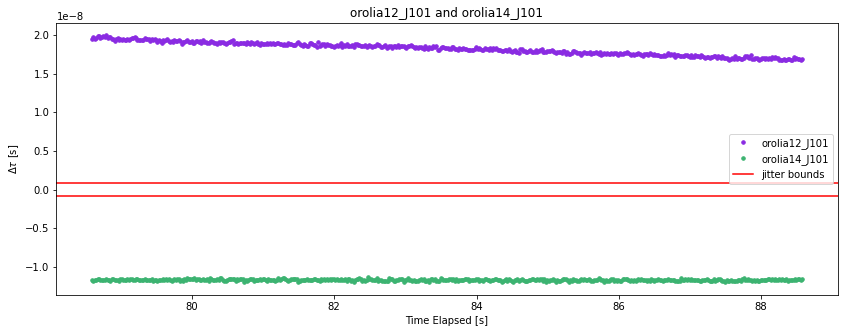

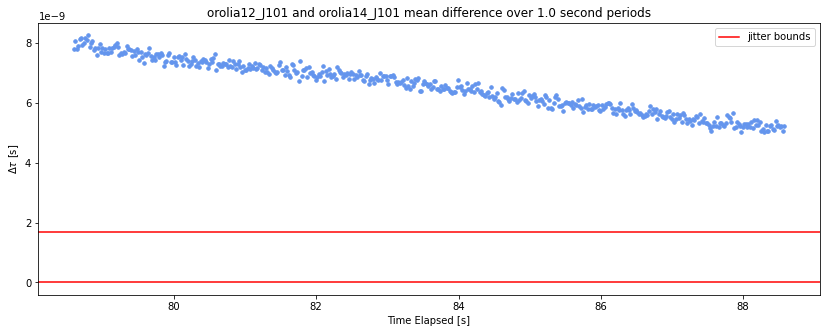

In [48]:
plot_relative_drift (2,6,39000,39500,161000,216000,50)

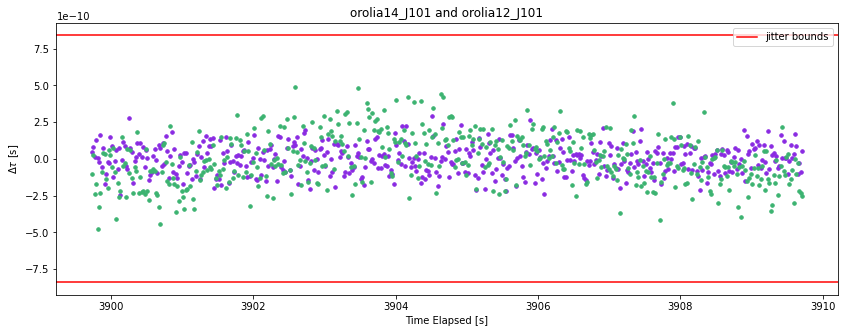

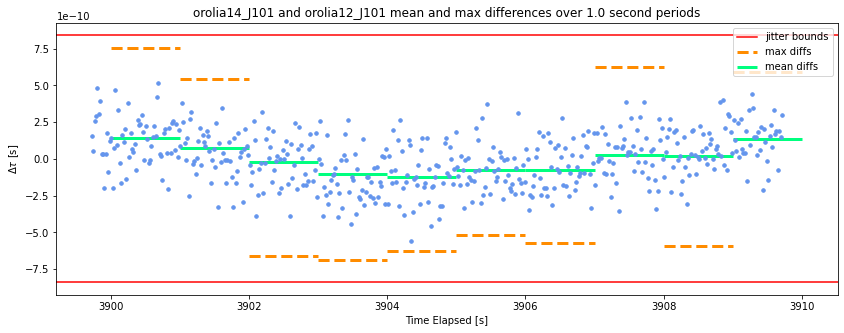

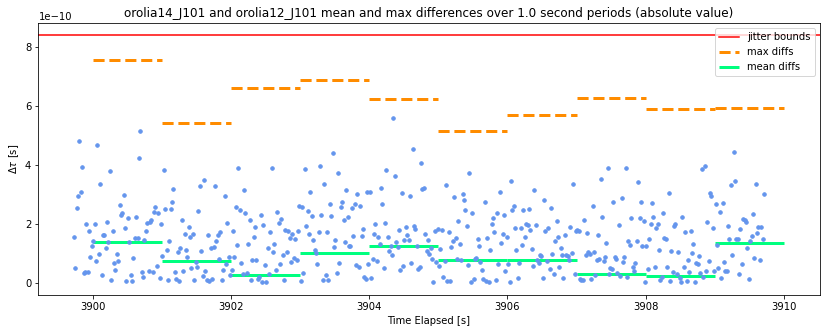

In [859]:
plot_relative_drift (6,2,195000,195500,50)

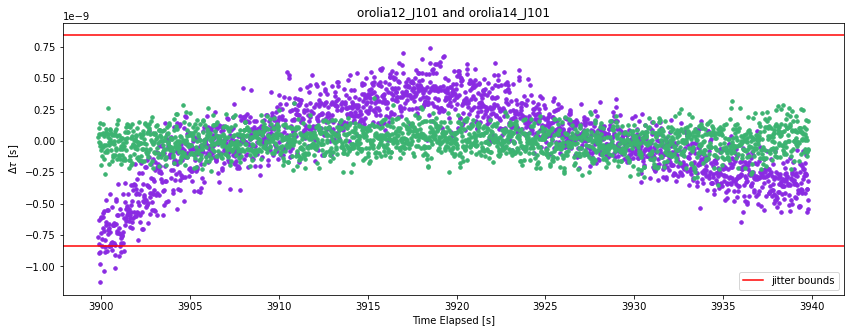

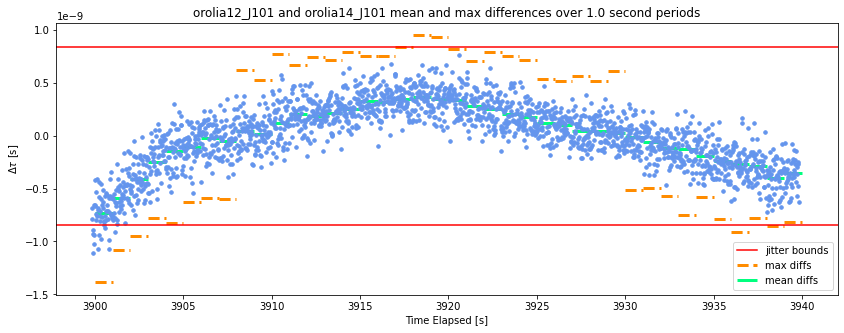

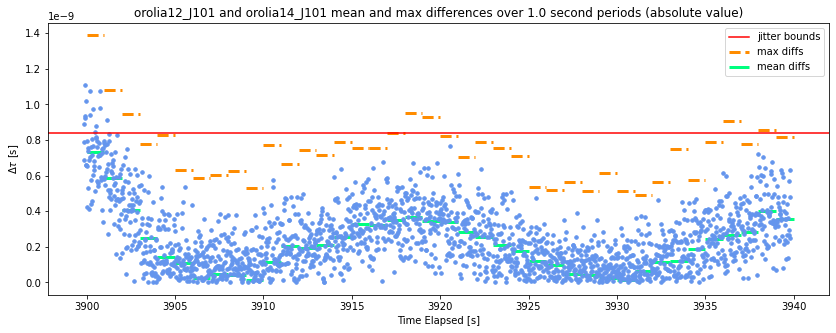

In [869]:
plot_relative_drift (2,6,195000,197000,50)

<ipython-input-183-f69b7535167d>:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\audre\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


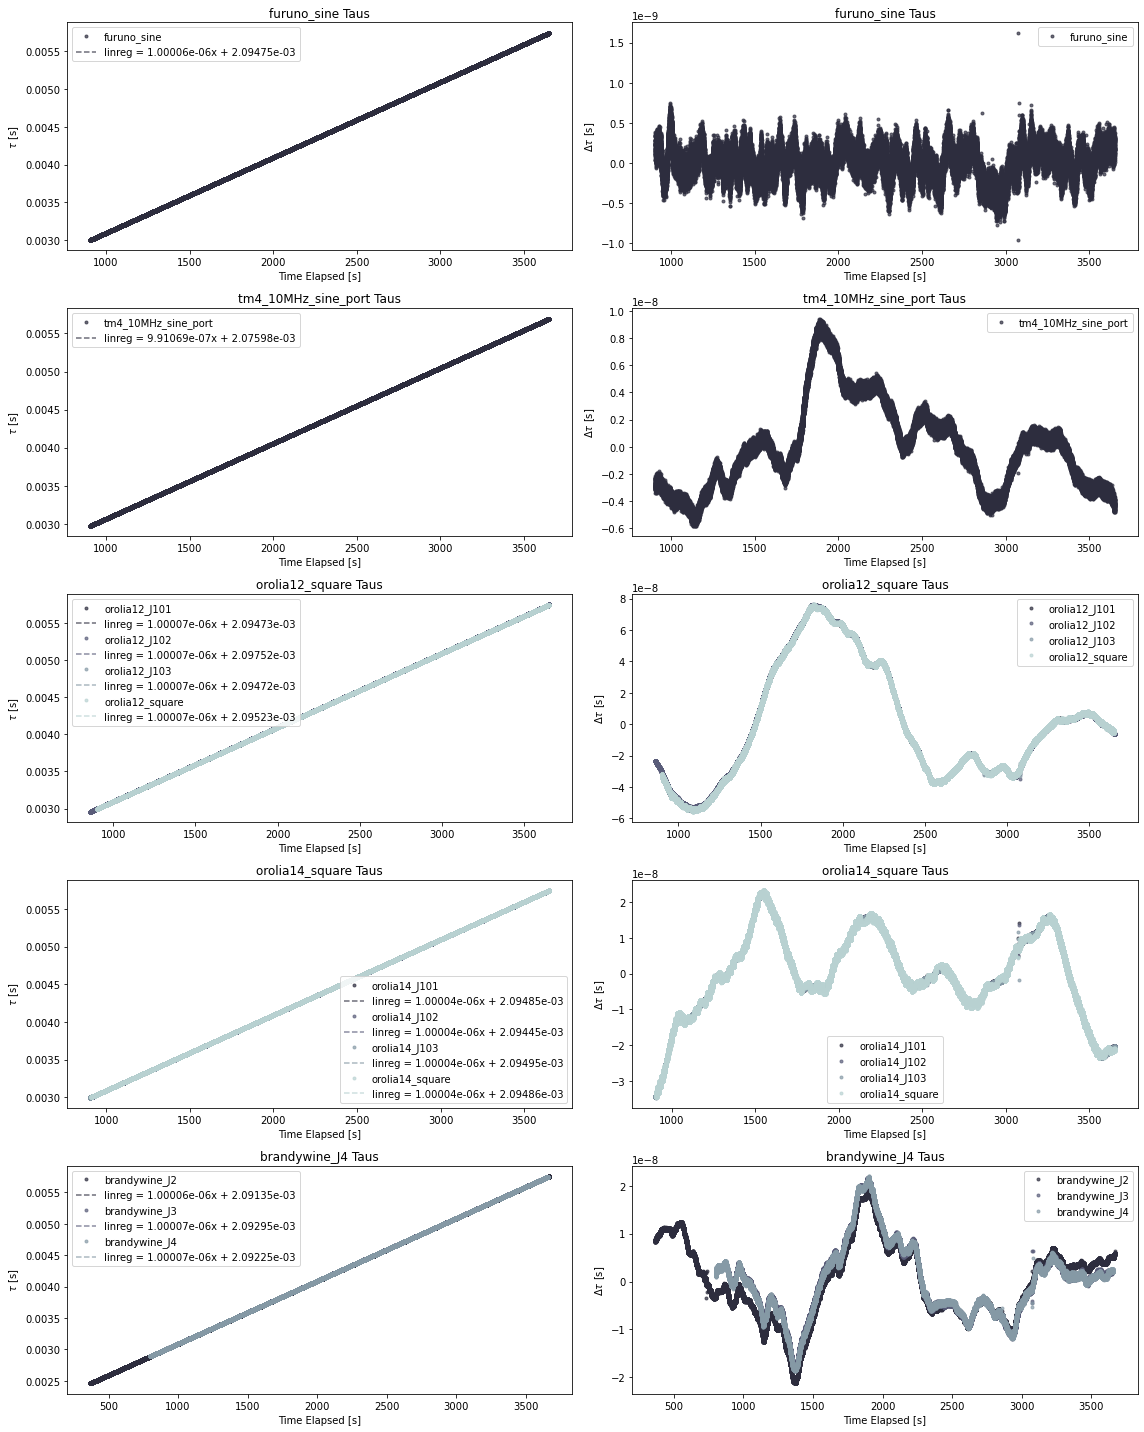

In [183]:
nestedclocks=[[furuno_sine],\
              [tm4],\
              [orolia12_J101,orolia12_J102,orolia12_J103,orolia12_square],\
              [orolia14_J101,orolia14_J102,orolia14_J103,orolia14_square],\
              [brandywine_J2,brandywine_J3,brandywine_J4]]
nestedtitles=[["furuno_sine"],\
              ["tm4_10MHz_sine_port"],\
              ["orolia12_J101","orolia12_J102","orolia12_J103","orolia12_square"],\
              ["orolia14_J101","orolia14_J102","orolia14_J103","orolia14_square"],\
              ["brandywine_J2","brandywine_J3","brandywine_J4"]]
colorsarr=plt.cm.bone(np.linspace(0,1,6),alpha=0.7)
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(16,20))

for h,cllist in enumerate(nestedclocks):
    ax1,ax2=axes[h]
    #ax1.set_facecolor('k')
    #ax2.set_facecolor('k')
    for i,ax in enumerate(cllist):
        yax=nestedclocks[h][i].taus[tlb:tub]
        tax=np.array(2.56e-6*nestedclocks[h][i].fpgatime)[tlb:tub]
        ax1.plot(tax,yax,'.',c=colorsarr[i+1],label=nestedtitles[h][i])
        popt,pcov=curve_fit(line_jackass,tax,yax)
        #print(popt)
        ax1.plot(tax,line_jackass(tax,*popt),'--',c=colorsarr[i+1],label='linreg = {:.5e}x + {:.5e}'.format(popt[0],popt[1]))
        ax1.legend()
        ax1.set_ylabel(r'$\tau$ [s]')
        ax1.set_xlabel(r'Time Elapsed [s]')
        ax1.set_title('{} Taus'.format(str(nestedtitles[h][i])))
        popt,pcov=curve_fit(line_jackass,tax,yax)
        ax2.plot(tax,yax-line_jackass(tax,*popt),'.',c=colorsarr[i+1],label=nestedtitles[h][i])
        ax2.set_ylabel(r'$\Delta\tau$ [s]')
        ax2.set_xlabel(r'Time Elapsed [s]')
        ax2.set_title('{} Taus'.format(str(nestedtitles[h][i])))
        ax2.legend()
plt.tight_layout()